In [1]:
import pandas as pd
from pca import pca
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Hoofdcomponentenanalyse

Hoofdcomponentenanalyse (PCA) is een statistische techniek die wordt gebruikt voor dimensionale reductie. Dit is een techniek  waarmee de dimensies of variabelen van een dataset worden verminderd, terwijl zo veel mogelijk relevante informatie behouden blijft. Het doel is om de complexiteit van gegevens te verminderen door de dataset om te zetten in een lagere dimensionale ruimte, terwijl belangrijke patronen en relaties in de gegevens behouden blijven.

De overgebleven dimensies, de 'hoofdcomponenten' zijn een combinatie van de oorspronkelijke variabelen en kunnen worden gebruikt om de belangrijkste patronen in de data te identificeren. Het is hierdoor mogelijk om de data te visualiseren in een grafiek met minder dimensies. Niet elk component verklaard evenveel van de variantie in de data. De eerste component verklaard de meeste variantie, de tweede component verklaard de meeste variantie van de overgebleven variantie, etc. De toegevoegde waarde van een component neemt hierdoor af naarmate er meer componenten worden toegevoegd omdat elk nieuw component een kleiner deel van de variantie verklaard.



# 2. Analyze stemhulpen

Dit is een analyse van hoe de verschillende partijen zich tot elkaar verhouden op basis van de stellingen van de stemhulpen. Het doel is om hierdoor een beter beeld te kunnen geven van het antwoord op vragen als; "Waar bevindt de NSC zich op het politieke spectrum?", "hoeveel overlap is er tussen de partijen?".

Elke vraag in een stemhulp representeert een dimensie, dit betekent dat een stemhulp met 30 vragen een 30 dimensionale dataset oplevert. Om deze data alsnog te kunnen visualiseren is er een hoofdcomponentenanalyse toegepast op de data van alle stemhulpen om het aantal dimensies terug te brengen tot 1, 2 of 3 dimensies. Hierdoor is het mogelijk de posities van de partijen in een grafiek te visualiseren. Partijen die zich dicht bij elkaar bevinden zijn het met elkaar eens, partijen die ver van elkaar af staan zijn het oneens. Het is belangrijk de beseffen dat niet elke as ('component') evenveel van de variantie verklaard. In de grafieken staat per as aangegeven welk deel van de variantie verklaard wordt en dus ook hoe 'belangrijk' deze as is. 

Per component is er analyse van de stellingen die de grootste invloed hebben op de positie van de partijen. Hierdoor wordt inzichtelijk gemaakt wat een as in de grafiek representeert. De antwoorden van de partijen op de stellingen zijn gecodeerd als nummer. Hoe hoger het nummer, hoe meer de partij het eens is met de stelling, negatieve nummers betekenen dat de partij het oneens is met de stelling. Deze antwoorden worden vermenigvuldigt met de waardes ('loadings') die de stellingen hebben voor de component. De som van deze vermenigvuldigingen is de positie van de partij op de component.

Als laatste heb ik de corrolatie tussen de antwoorden van de partijen berekend. Hoe hoger de correlatie, hoe meer de partijen het met elkaar eens zijn. 
 


## 2.1 Check je stem

[Check je stem](https://checkjestem.nl/) is een stemhulp die niet de standpunten maar het stemgedrag van de partijen volgt. Het probleem met deze checker is dat bij de gekozen stemmingen BIJ1 (7) en NSC (3) niet altijd aanwezig waren. Deze stemmingen kunnen hierdoor *of* niet meegenomen worden in de analyse, *of* de analyse moet zonder de partijen plaatsvinden. Gezien het grote aantal gemiste stemmingen (7) en het feit dat de partij in de peilingen stabiel op 0 zetels staat is er besloten om BIJ1 weg te laten uit de analyse. NSC is wel meegenomen gezien het grote aantal zetels in de peilingen. 

Van de 26 stellingen blijven er hierdoor 23 over. Het stemgedrag van Groenlinks en de PvdA had 100% overlap en zijn daarom samengevoegd tot de 'GL-PvdA' combinatie waarmee ze in de verkiezingen ook op de lijst staan.


In [2]:
# Load data and prepare DataFrame for analysis
check_je_stem_df = pd.read_csv('data/check_je_stem.csv')
check_je_stem_df = check_je_stem_df.drop("BIJ1", axis=1)
check_je_stem_df = check_je_stem_df.dropna(axis=0)
check_je_stem_labels = check_je_stem_df.columns[1:]
check_je_stem_df =check_je_stem_df.iloc[1:]
check_je_stem_questions = check_je_stem_df["vraag"]
check_je_stem_df = check_je_stem_df.iloc[:, 1:]

# Prepared DataFrame is assigned its own variable to allow the original to be used in the Merged model.
check_je_stem_prepared = pd.DataFrame(data=check_je_stem_df, columns=check_je_stem_labels)
check_je_stem_prepared = check_je_stem_prepared.rename(index=check_je_stem_questions)
check_je_stem_prepared = check_je_stem_prepared.transpose()

### Verklaarde variantie per component

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [22] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 5 Principal Components explain [83.54%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

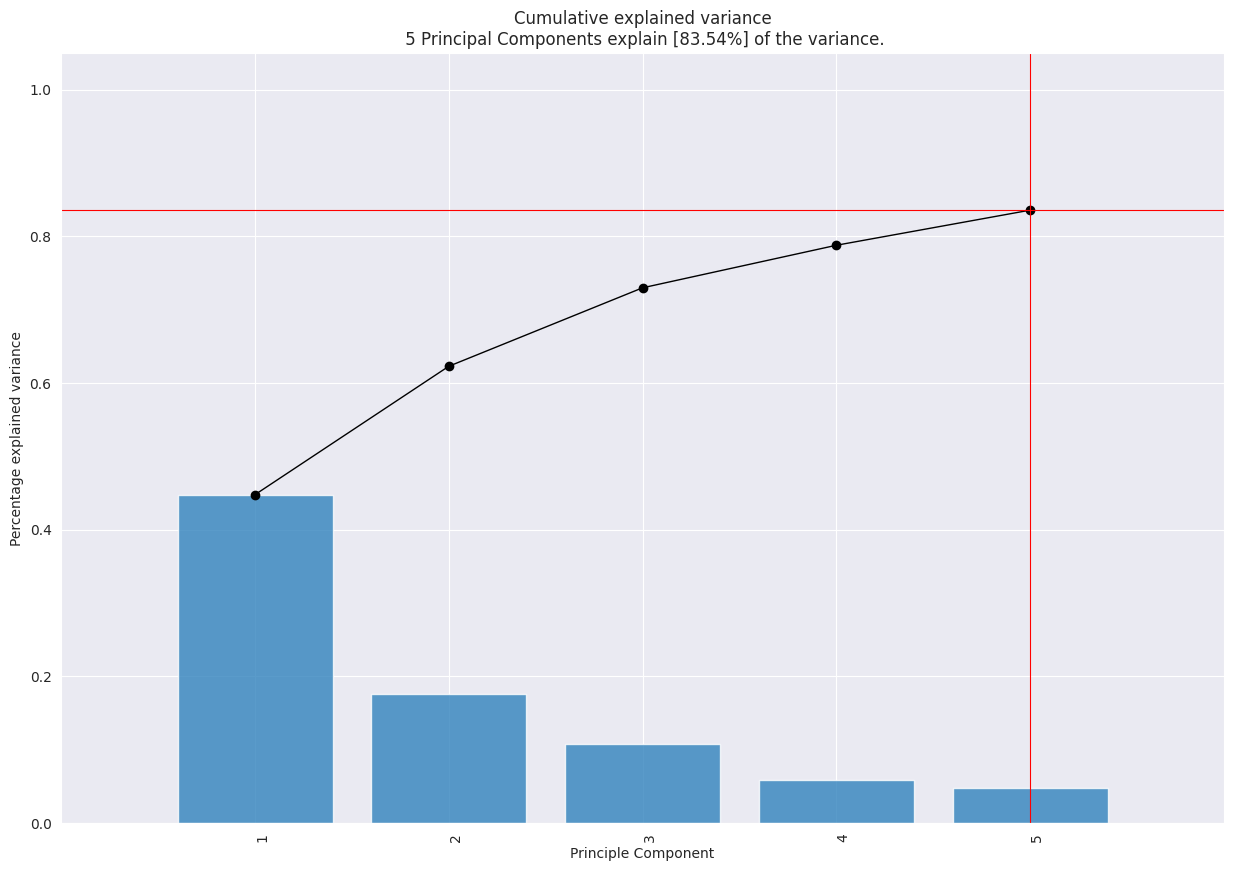

In [3]:
model = pca(n_components=5)
results = model.fit_transform(check_je_stem_prepared, row_labels=check_je_stem_labels)
model.plot()

### Visualisatie van de posities van de partijen

#### 1d

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [22] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': '1d Grafiek (diagonaal vanwege leesbaarheid)'}, xlabel='PC1 (44.7% expl.var)', ylabel='PC1 (44.7% expl.var)'>)

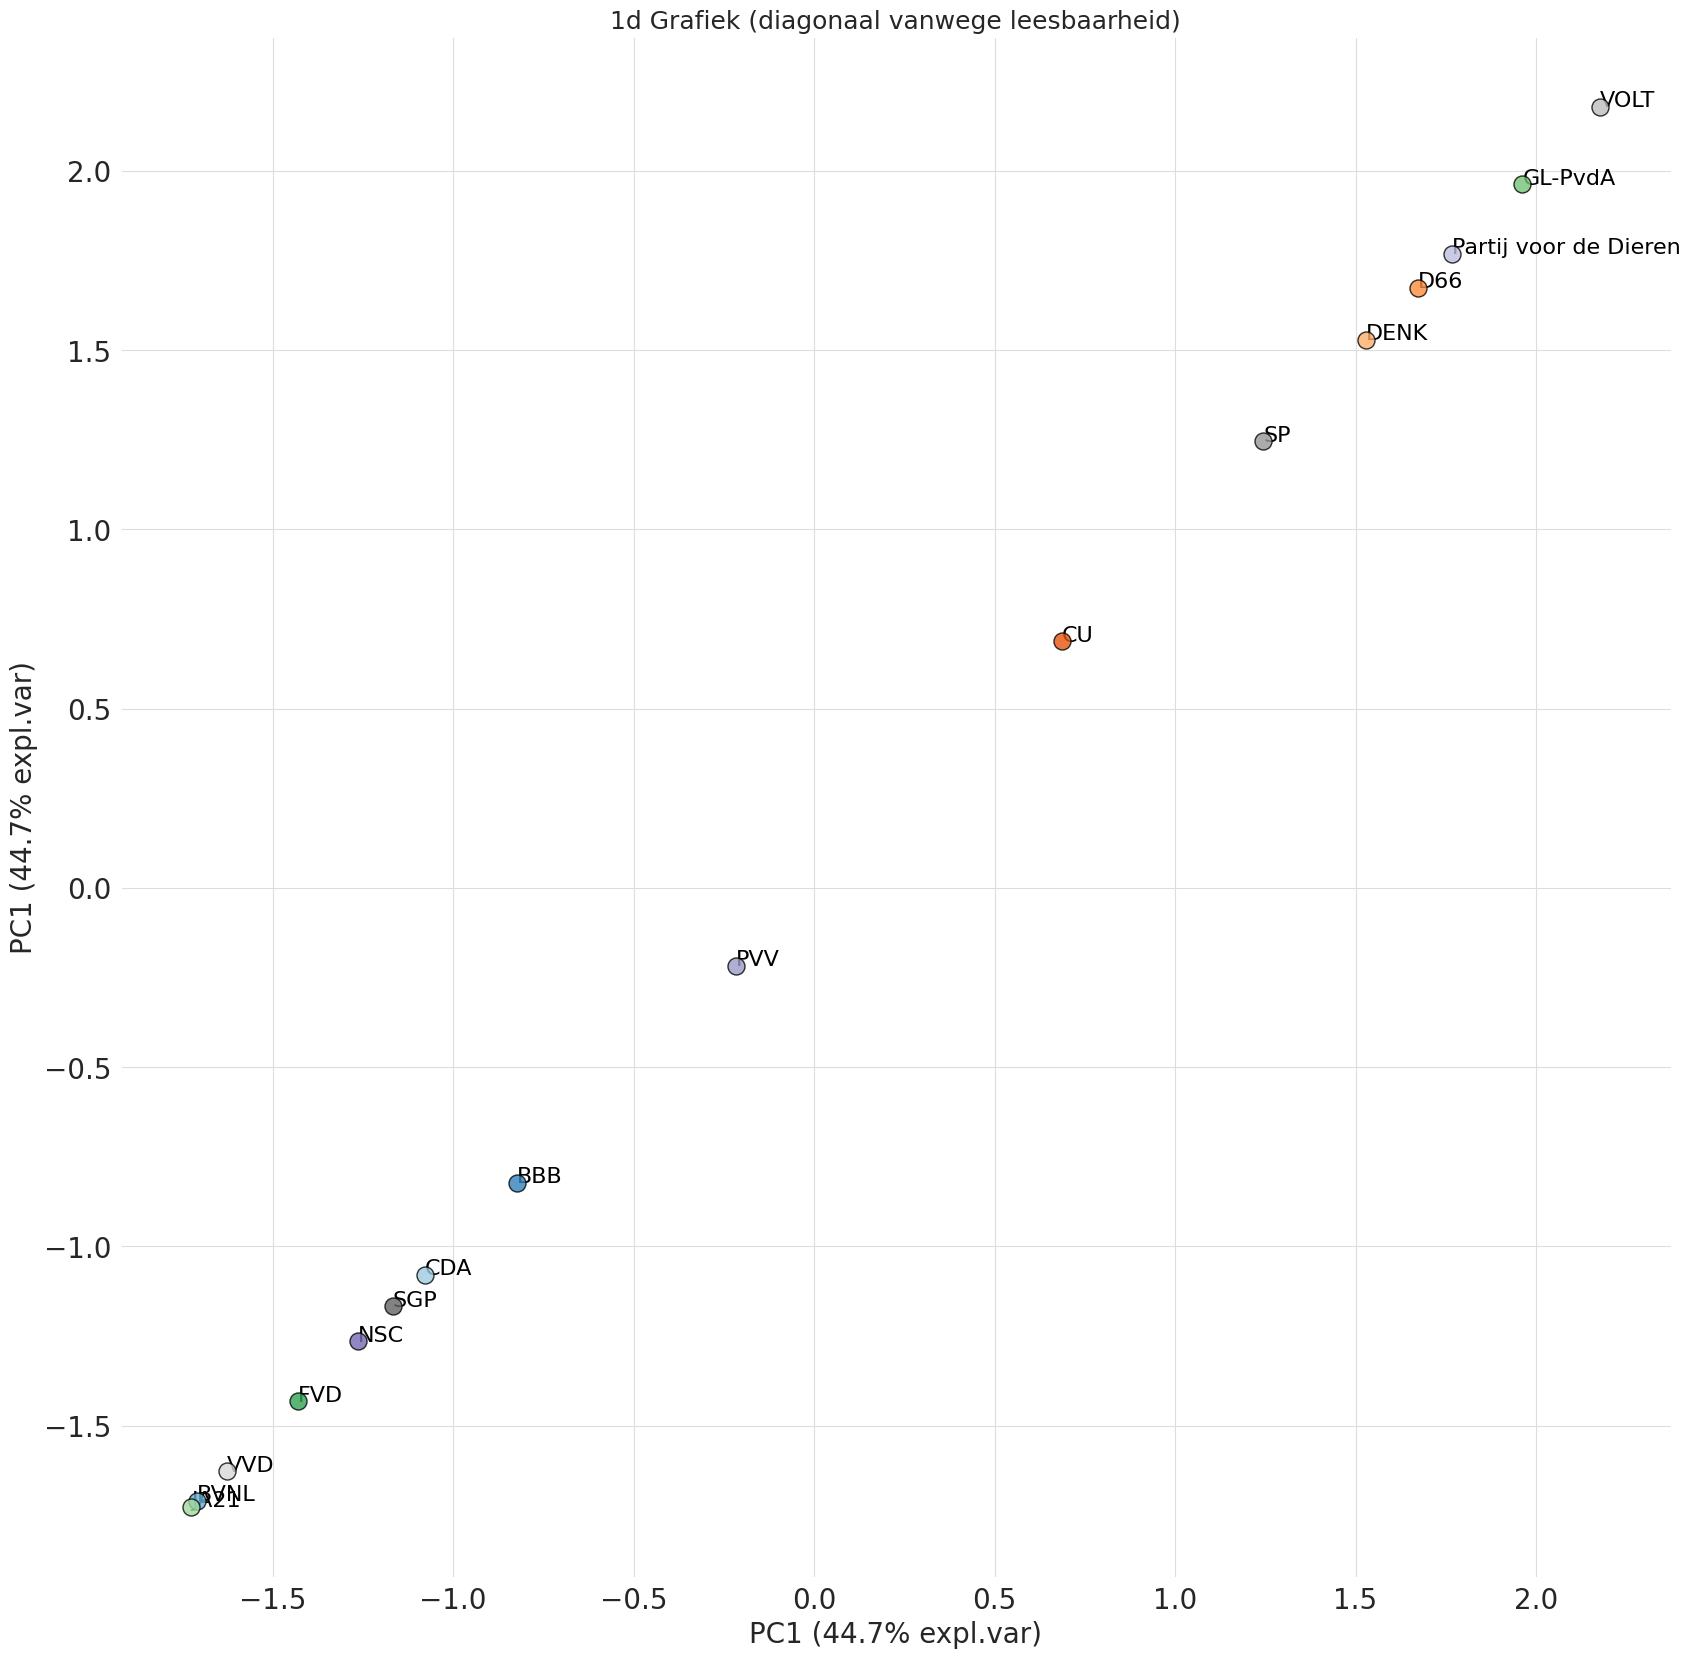

In [4]:
model = pca(n_components=2)
results = model.fit_transform(check_je_stem_prepared, row_labels=check_je_stem_labels)
model.scatter(legend=False, figsize=(20,20), labels=check_je_stem_labels, PC=(0,0), fontsize=16, title="1d Grafiek (diagonaal vanwege leesbaarheid)")


#### 2d

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [22] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [62.25%] of the variance'}, xlabel='PC1 (44.7% expl.var)', ylabel='PC2 (17.5% expl.var)'>)

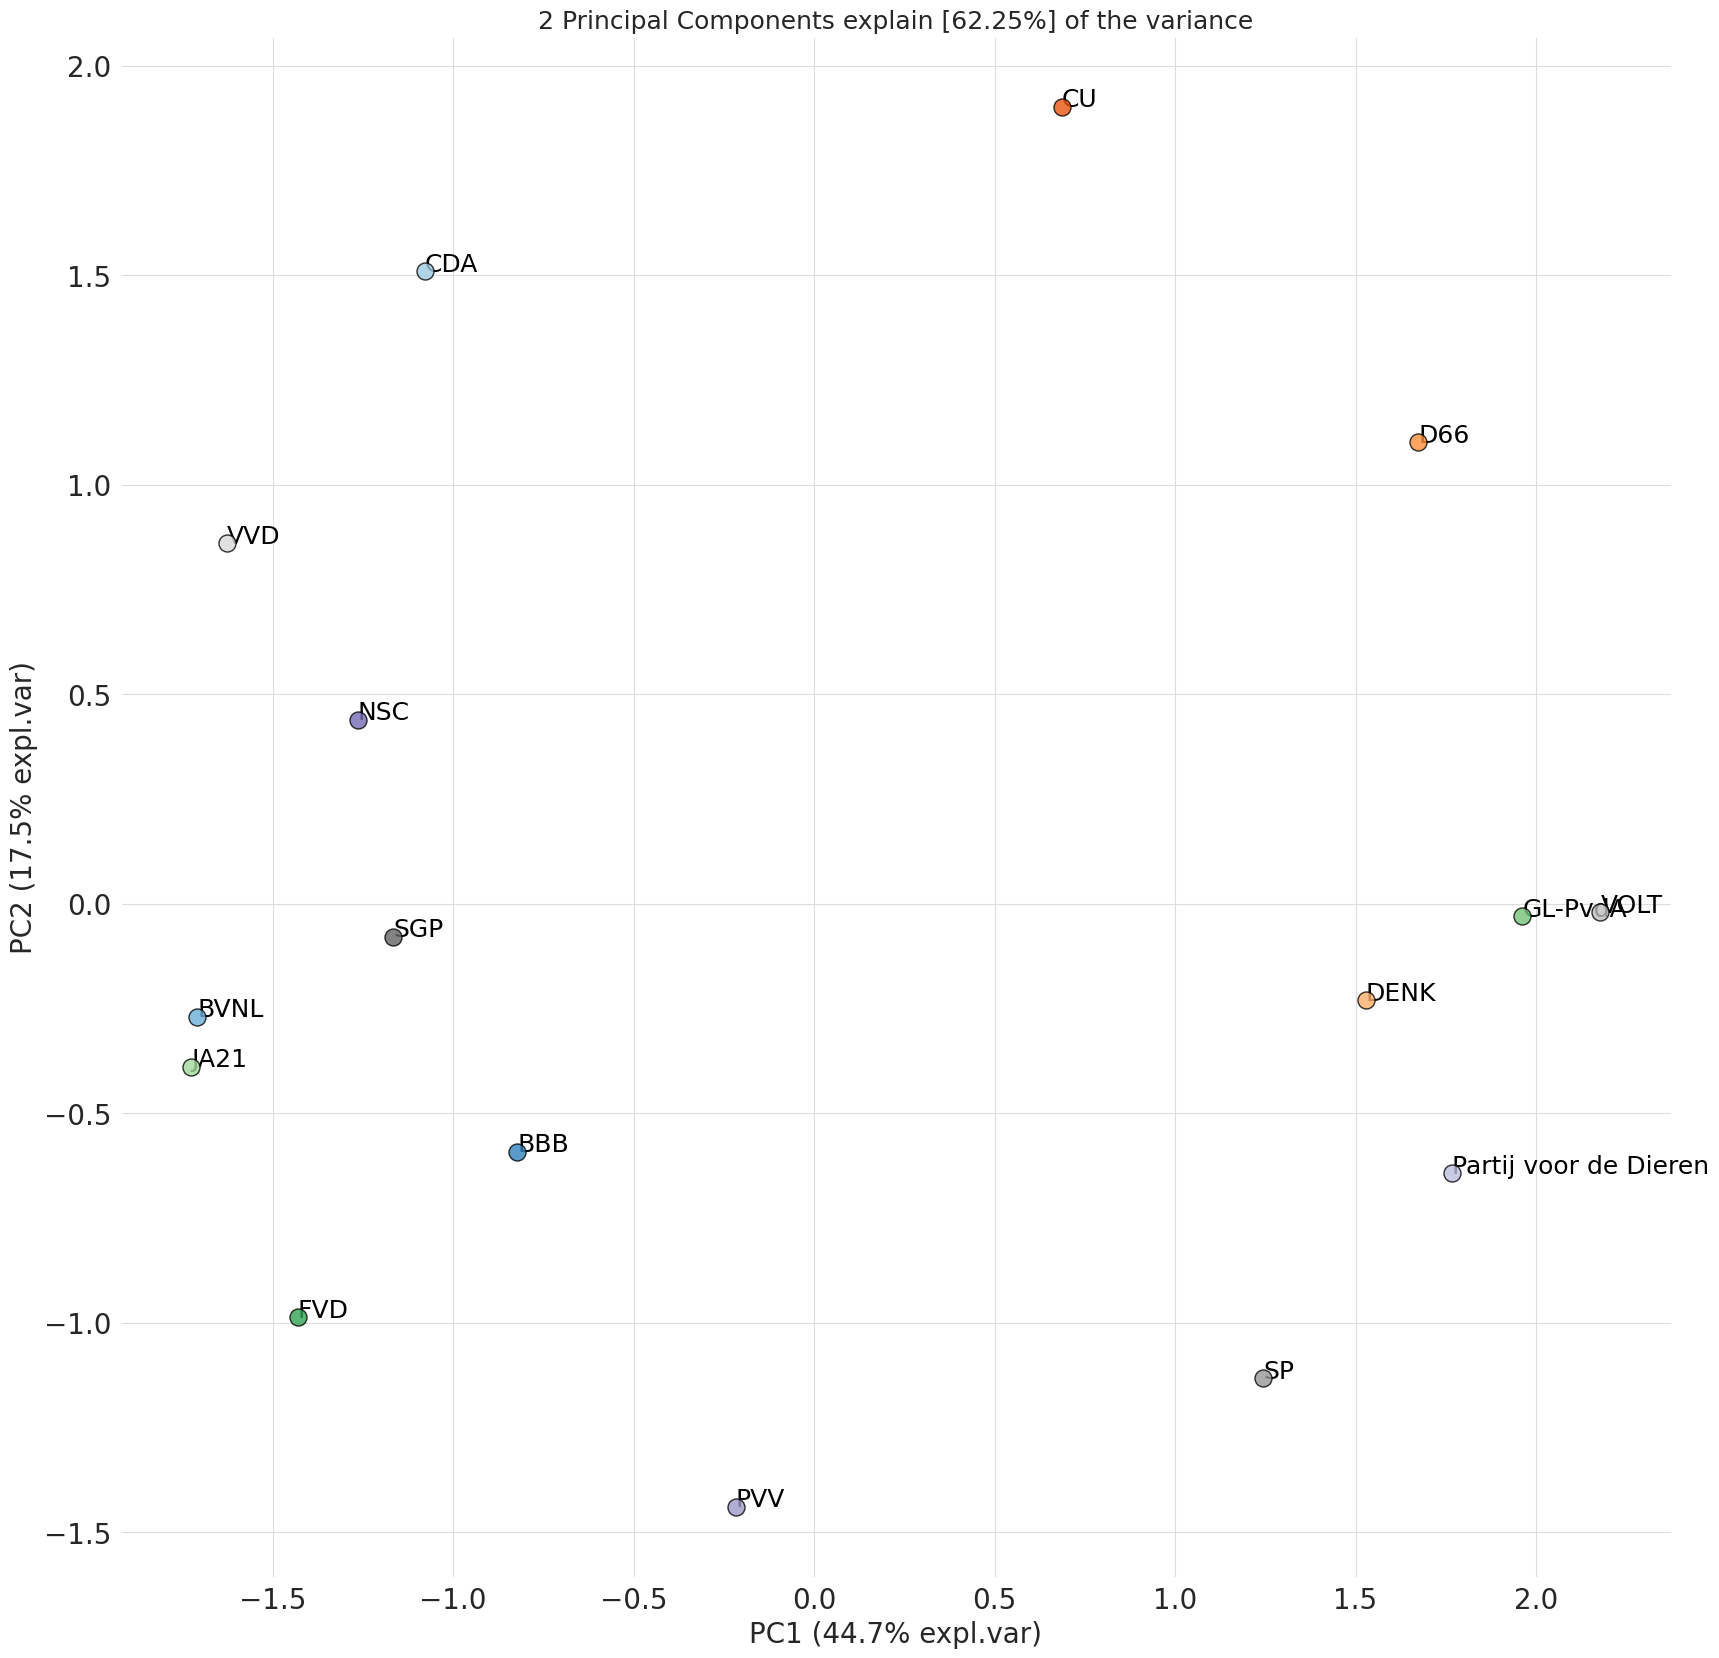

In [5]:
model = pca(n_components=2)
results = model.fit_transform(check_je_stem_prepared, row_labels=check_je_stem_labels)
model.scatter(legend=False, figsize=(20,20), labels=check_je_stem_labels)

#### 3d

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [22] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2000x2000 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [72.95%] of the variance'}, xlabel='PC1 (44.7% expl.var)', ylabel='PC2 (17.5% expl.var)', zlabel='PC3 (10.6% expl.var)'>)

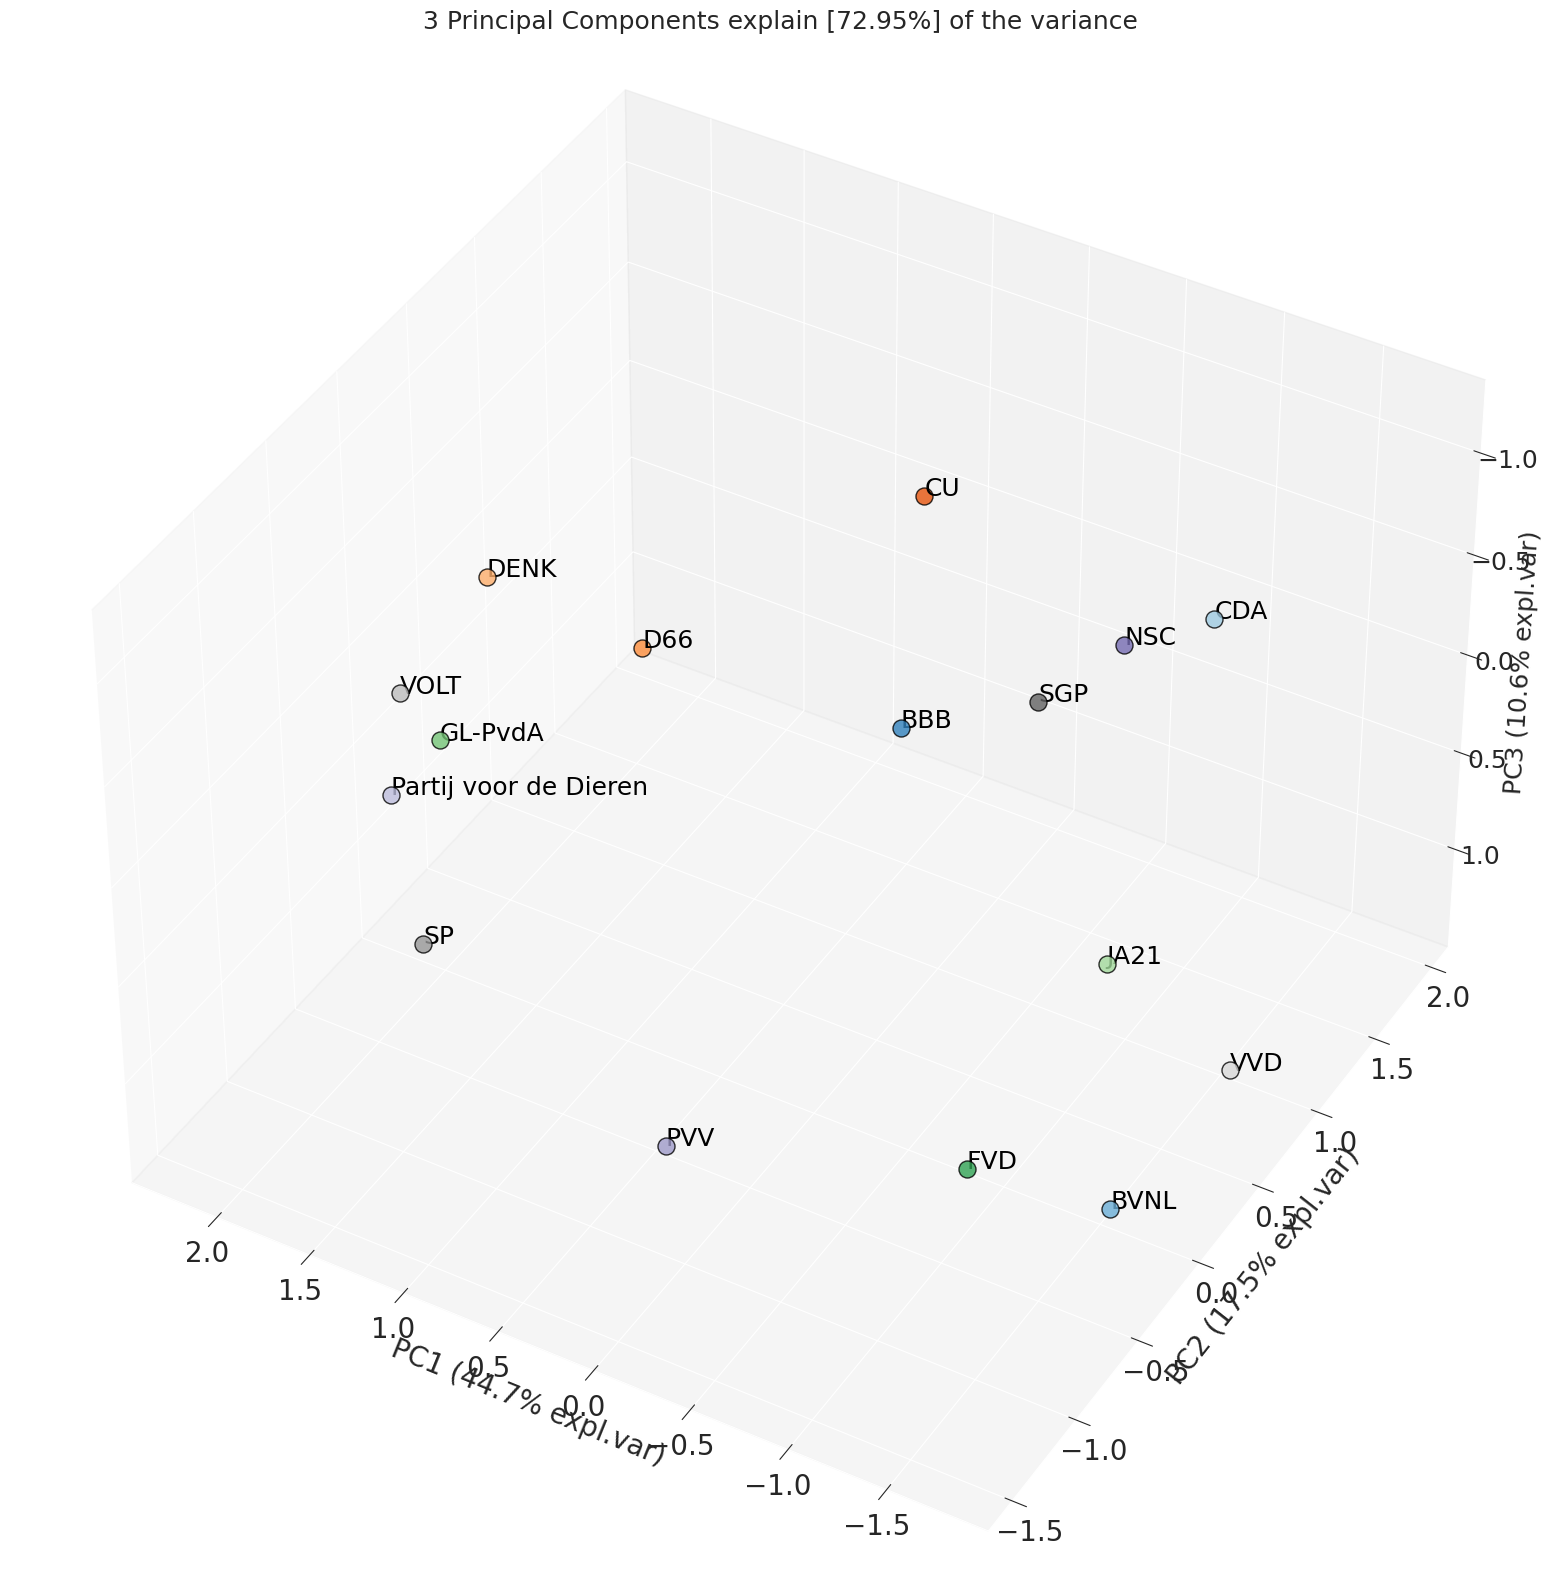

In [6]:
model = pca(n_components=3)
results = model.fit_transform(check_je_stem_prepared, row_labels=check_je_stem_labels)
model.scatter3d(legend=False, figsize=(20,20), labels=check_je_stem_labels)

### Analyse componenten

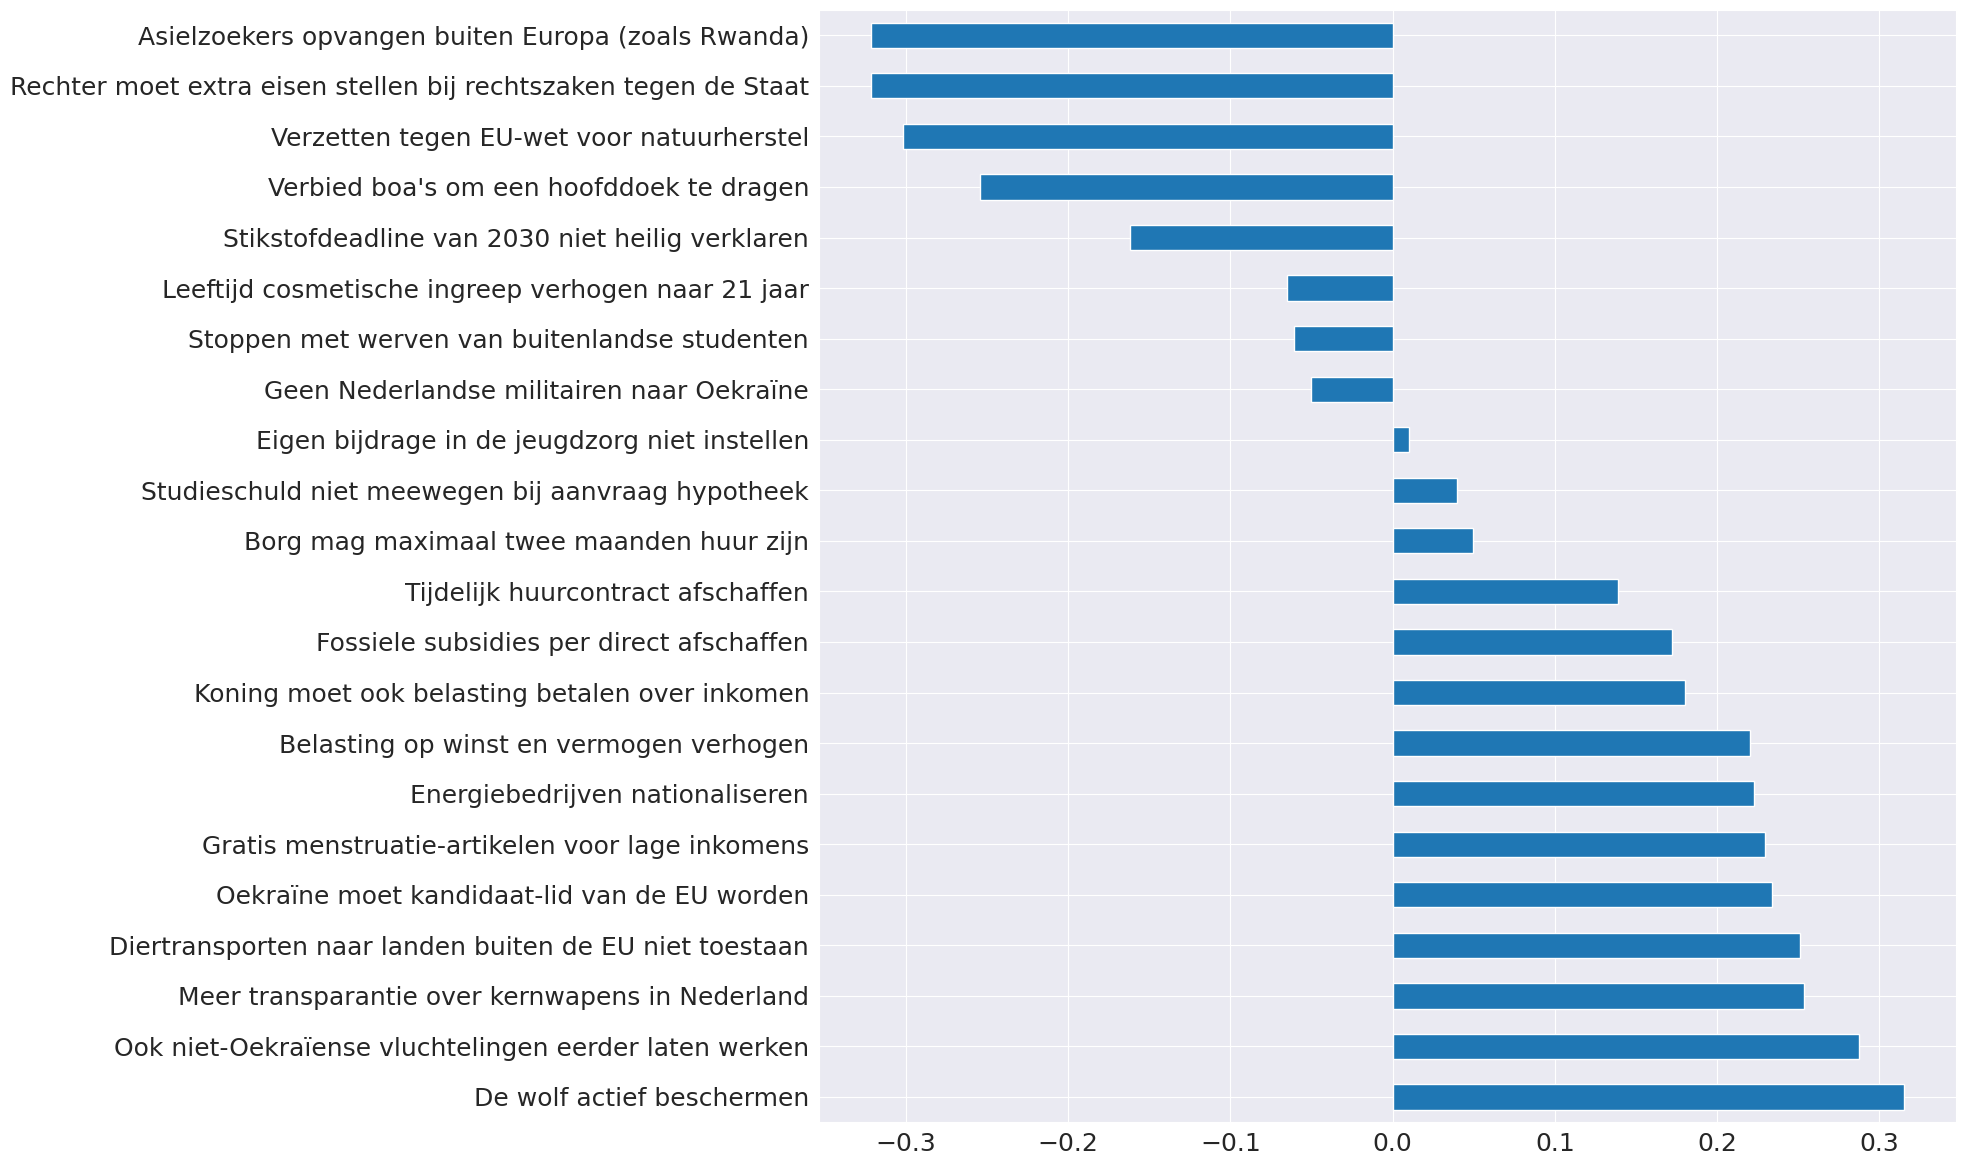

In [7]:
component_df = model.results["loadings"].iloc[0].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20,12))
component_df.plot.barh(ax=ax)
fig.tight_layout()

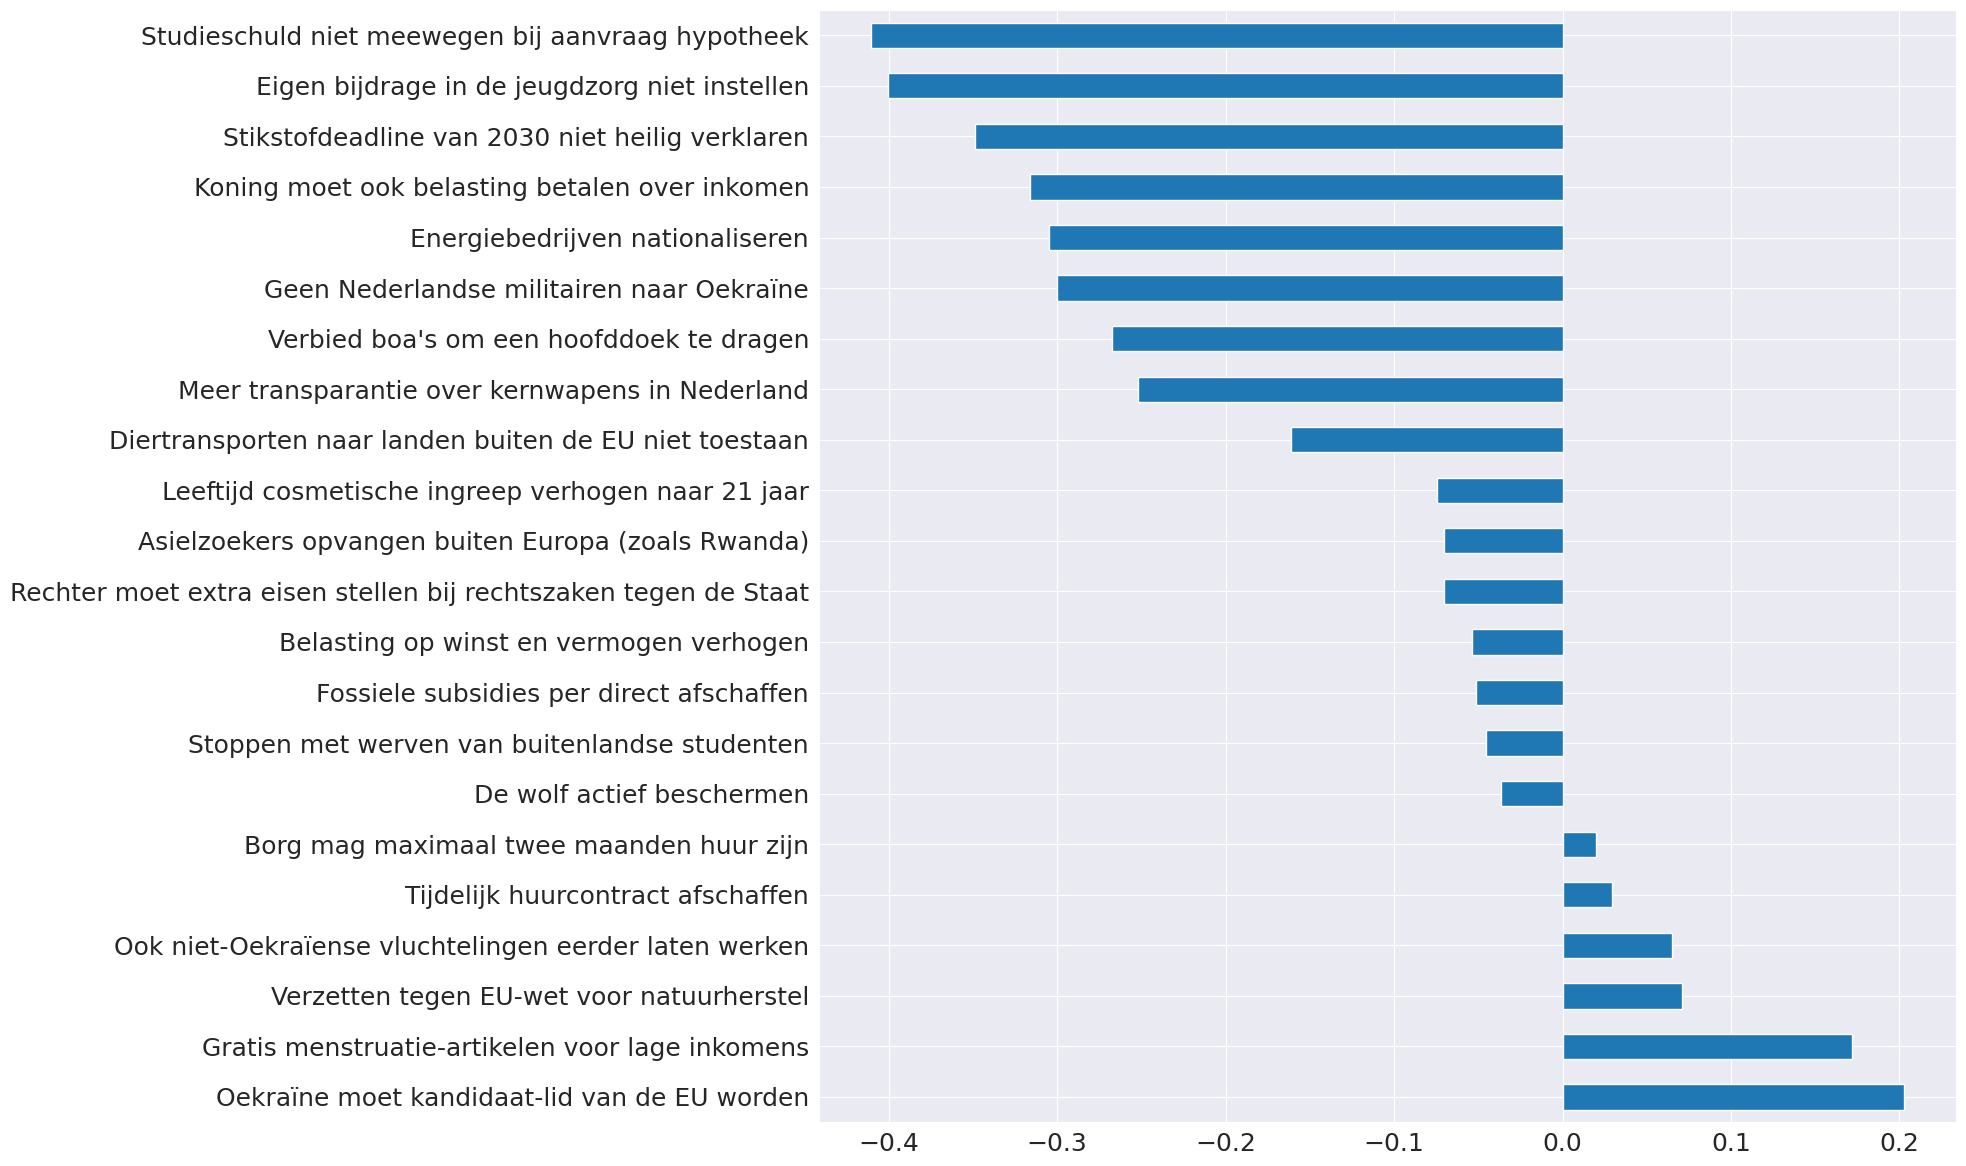

In [8]:
component_df = model.results["loadings"].iloc[1].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20,12))
component_df.plot.barh(ax=ax)
fig.tight_layout()

### Correlatie stemgedrag van de partijen

<Axes: >

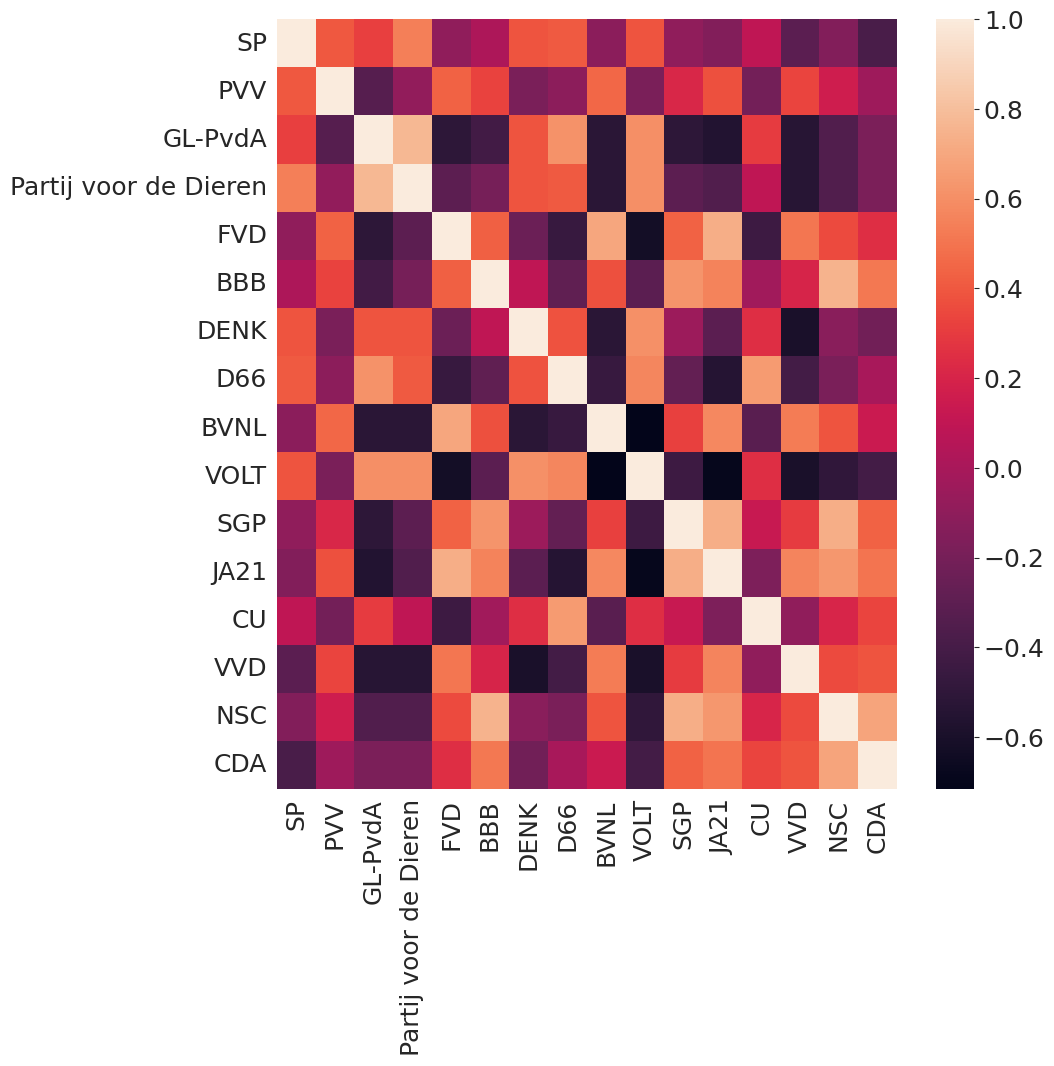

In [9]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(check_je_stem_df.corr())

In [10]:
check_je_stem_df.corr()

SP       PVV   GL-PvdA  Partij voor de Dieren  \
SP                     1.000000  0.398527  0.312500               0.541667   
PVV                    0.398527  1.000000 -0.332106              -0.088561   
GL-PvdA                0.312500 -0.332106  1.000000               0.770833   
Partij voor de Dieren  0.541667 -0.088561  0.770833               1.000000   
FVD                   -0.094356  0.431187 -0.509525              -0.301941   
BBB                    0.019920  0.328139 -0.418330              -0.199205   
DENK                   0.385758 -0.184482  0.385758               0.385758   
D66                    0.408248 -0.108465  0.612372               0.408248   
BVNL                  -0.113228  0.451243 -0.528396              -0.528396   
VOLT                   0.385758 -0.184482  0.597925               0.597925   
SGP                   -0.094356  0.210580 -0.509525              -0.301941   
JA21                  -0.149071  0.376256 -0.559017              -0.354044   
CU                     0.094356 -0.210580  0.301941               0.094356   
VVD                   -0.312500  0.332106 -0.541667              -0.541667   
NSC                   -0.149071  0.158424 -0.354044              -0.354044   
CDA                   -0.385758 -0.040996 -0.173591              -0.173591   

                            FVD       BBB      DENK           D66      BVNL  \
SP                    -0.094356  0.019920  0.385758  4.082483e-01 -0.113228   
PVV                    0.431187  0.328139 -0.184482 -1.084652e-01  0.451243   
GL-PvdA               -0.509525 -0.418330  0.385758  6.123724e-01 -0.528396   
Partij voor de Dieren -0.301941 -0.199205  0.385758  4.082483e-01 -0.528396   
FVD                    1.000000  0.424043 -0.244600 -4.622502e-01  0.692308   
BBB                    0.424043  1.000000  0.092214 -2.927700e-01  0.369910   
DENK                  -0.244600  0.092214  1.000000  3.779645e-01 -0.524142   
D66                   -0.462250 -0.292770  0.377964  1.000000e+00 -0.462250   
BVNL                   0.692308  0.369910 -0.524142 -4.622502e-01  1.000000   
VOLT                  -0.628971 -0.313527  0.607143  5.669467e-01 -0.716328   
SGP                    0.435897  0.622532 -0.052414 -2.773501e-01  0.316239   
JA21                   0.725797  0.552340 -0.310530 -5.477226e-01  0.573886   
CU                    -0.435897 -0.027067  0.244600  6.471502e-01 -0.316239   
VVD                    0.509525  0.199205 -0.597925 -4.082483e-01  0.528396   
NSC                    0.354459  0.748331 -0.120761 -1.825742e-01  0.388217   
CDA                    0.244600  0.516398 -0.214286  1.573593e-17  0.139771   

                           VOLT       SGP      JA21        CU       VVD  \
SP                     0.385758 -0.094356 -0.149071  0.094356 -0.312500   
PVV                   -0.184482  0.210580  0.376256 -0.210580  0.332106   
GL-PvdA                0.597925 -0.509525 -0.559017  0.301941 -0.541667   
Partij voor de Dieren  0.597925 -0.301941 -0.354044  0.094356 -0.541667   
FVD                   -0.628971  0.435897  0.725797 -0.435897  0.509525   
BBB                   -0.313527  0.622532  0.552340 -0.027067  0.199205   
DENK                   0.607143 -0.052414 -0.310530  0.244600 -0.597925   
D66                    0.566947 -0.277350 -0.547723  0.647150 -0.408248   
BVNL                  -0.716328  0.316239  0.573886 -0.316239  0.528396   
VOLT                   1.000000 -0.436785 -0.690066  0.244600 -0.597925   
SGP                   -0.436785  1.000000  0.725797  0.128205  0.301941   
JA21                  -0.690066  0.725797  1.000000 -0.168790  0.559017   
CU                     0.244600  0.128205 -0.168790  1.000000 -0.094356   
VVD                   -0.597925  0.301941  0.559017 -0.094356  1.000000   
NSC                   -0.500298  0.725797  0.633333  0.202548  0.354044   
CDA                   -0.410714  0.436785  0.500298  0.331957  0.385758   

                            NSC           CDA  
SP                    -0.149071 -3

## 2.2 StemWijzer

De [StemWijzer](https://www.stemwijzer.nl/) is gemaakt door de organisatie ProDemos en bevat 30 stellingen. Vragen kunnen beantwoord worden met 'ja', 'geen mening' en 'nee' welke ik als '2', '1' en '0' heb gecodeerd.


In [11]:
# Load data and prepare DataFrame for analysis
stemwijzer_df = pd.read_csv('data/stemwijzer.csv')
stemwijzer_labels = stemwijzer_df.columns[1:]
stemwijzer_df =stemwijzer_df.iloc[1:]
stemwijzer_questions = stemwijzer_df["Stelling (0=Nee; 1=Geen mening; 2=Ja)"]
stemwijzer_df = stemwijzer_df.iloc[:, 1:]

# Prepared DataFrame is assigned its own variable to allow the original to be used in the Merged model.
stemwijzer_df_prepared = pd.DataFrame(data=stemwijzer_df, columns=stemwijzer_labels)
stemwijzer_df_prepared = stemwijzer_df_prepared.rename(index=stemwijzer_questions)
stemwijzer_df_prepared = stemwijzer_df_prepared.transpose()

### Verklaarde variantie per component

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 5 Principal Components explain [78.03%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

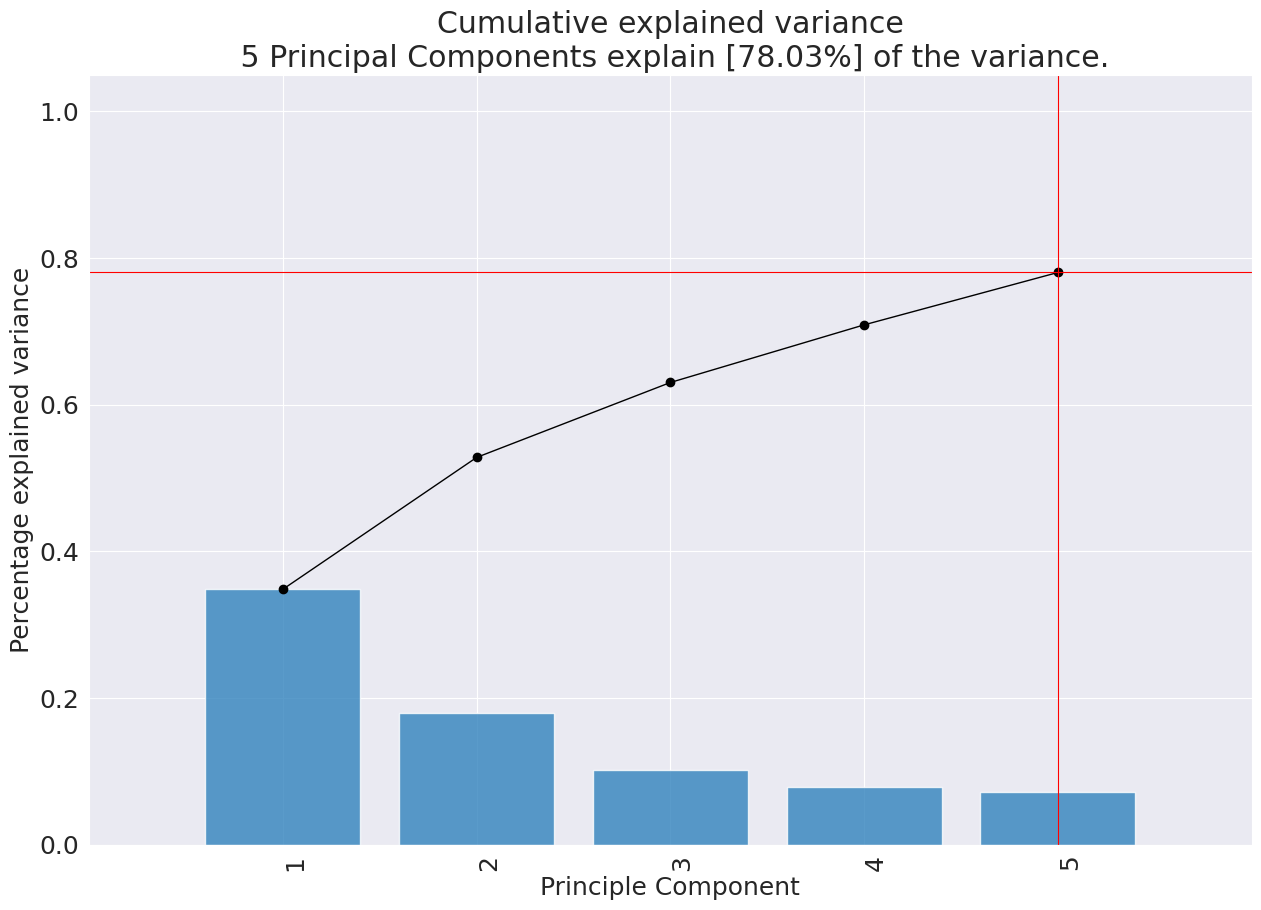

In [12]:
model = pca(n_components=5)
results = model.fit_transform(stemwijzer_df_prepared, row_labels=stemwijzer_labels)
model.plot()

### Visualisatie van de posities van de partijen

#### 1d

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': '1d Grafiek (diagonaal vanwege leesbaarheid)'}, xlabel='PC1 (34.8% expl.var)', ylabel='PC1 (34.8% expl.var)'>)

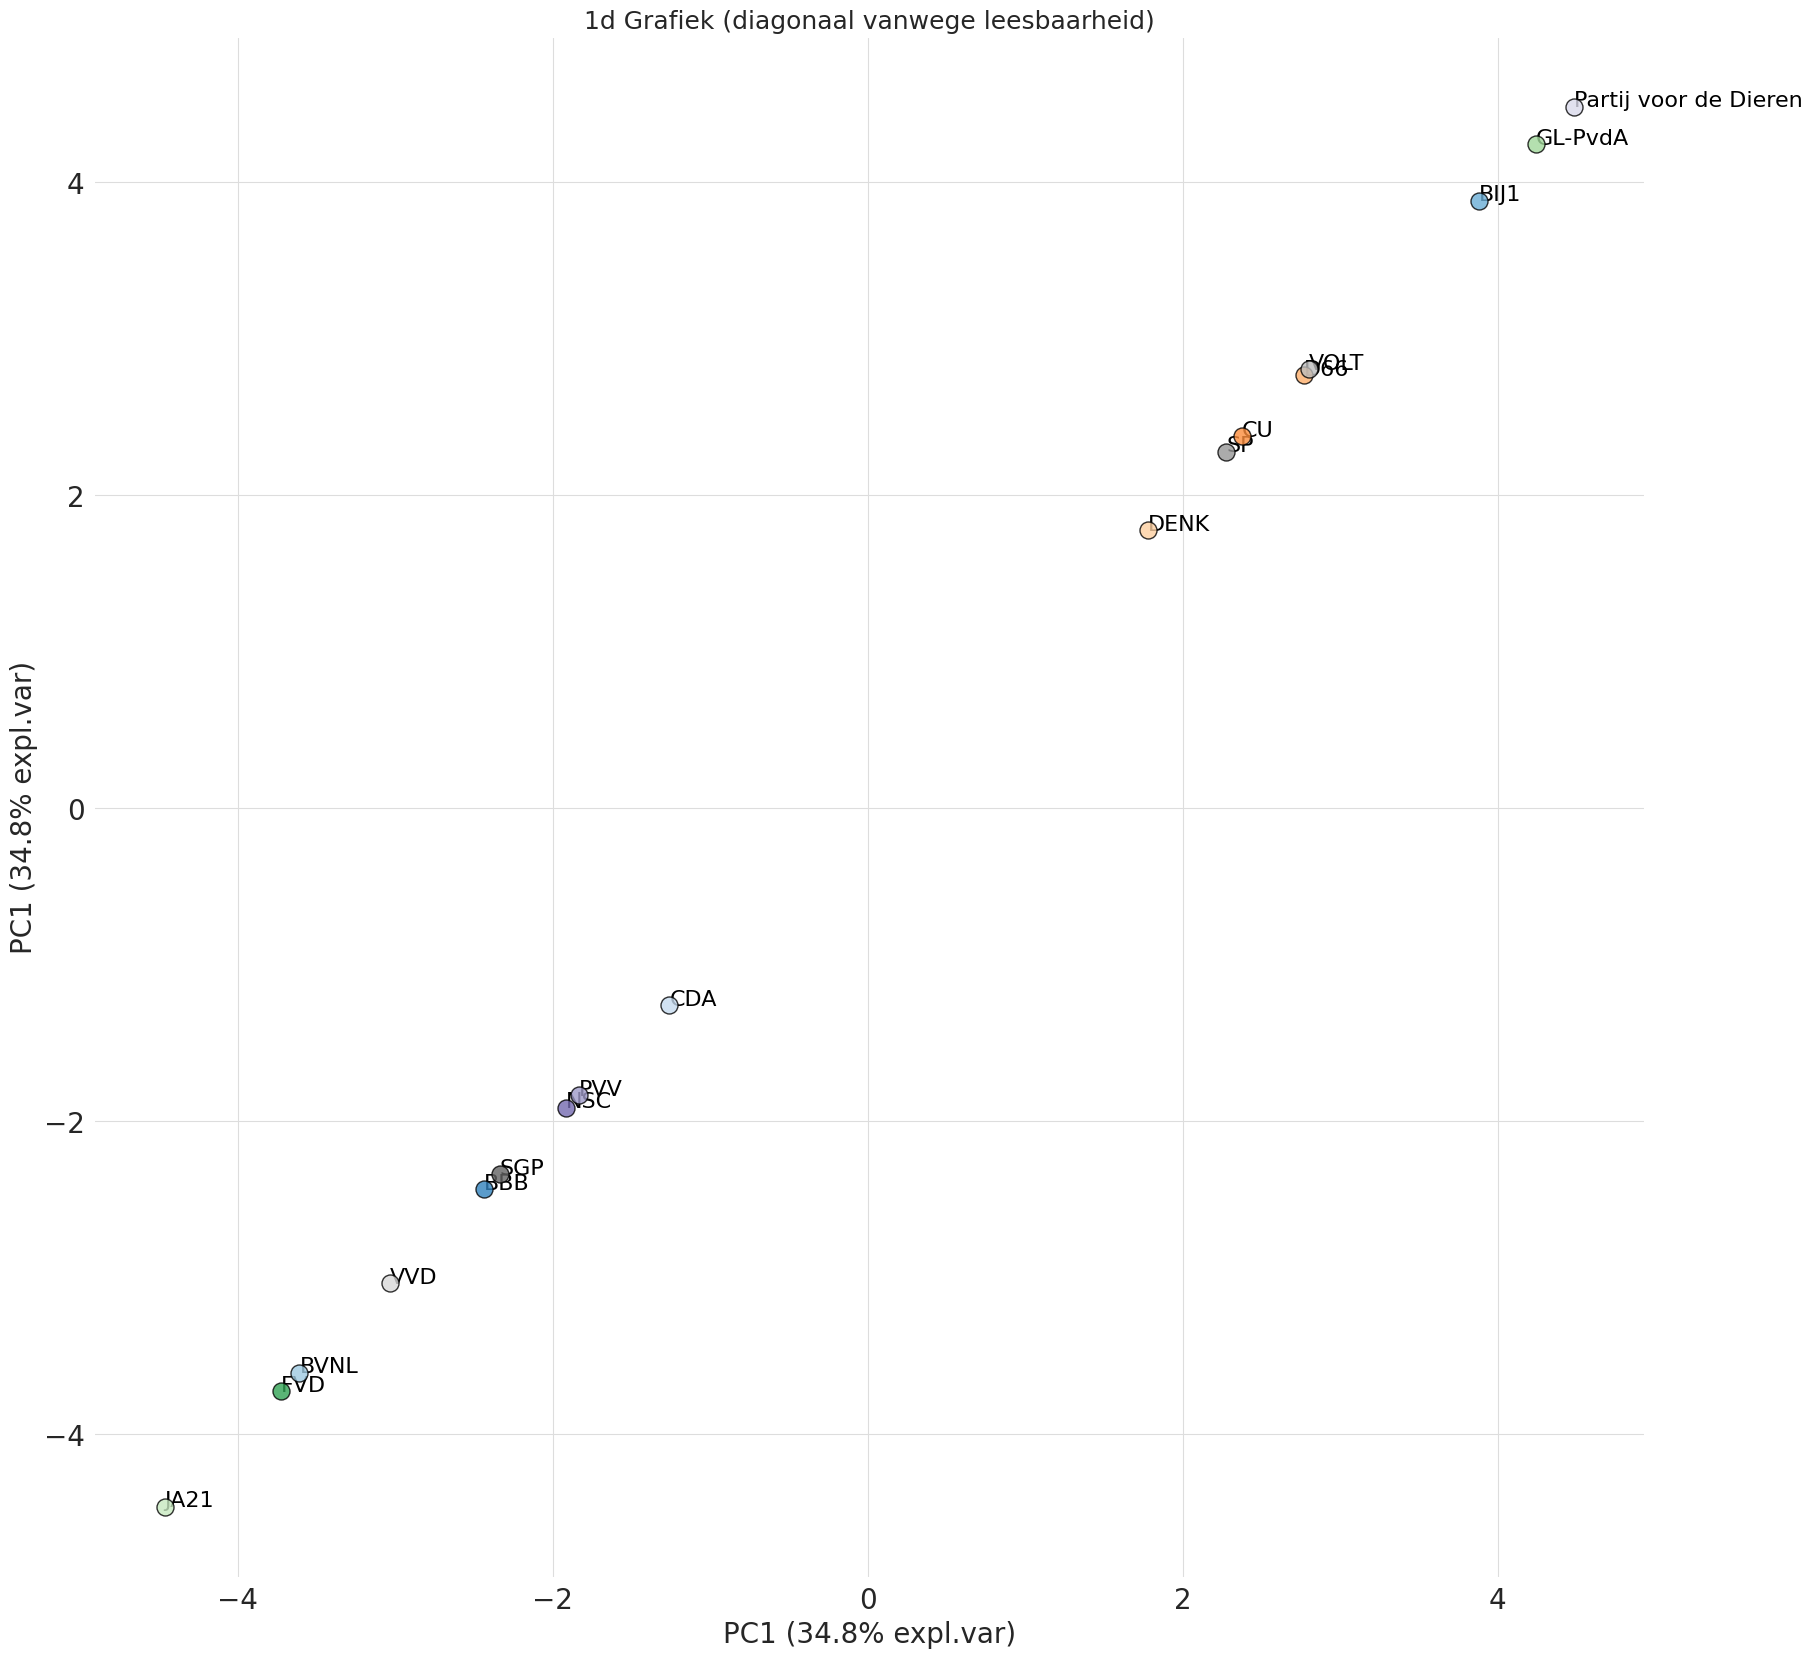

In [13]:
model = pca(n_components=2)
results = model.fit_transform(stemwijzer_df_prepared, row_labels=stemwijzer_labels)
model.scatter(legend=False, figsize=(20,20), labels=stemwijzer_labels, PC=(0,0), fontsize=16, title="1d Grafiek (diagonaal vanwege leesbaarheid)")

#### 2d

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [52.81%] of the variance'}, xlabel='PC1 (34.8% expl.var)', ylabel='PC2 (17.9% expl.var)'>)

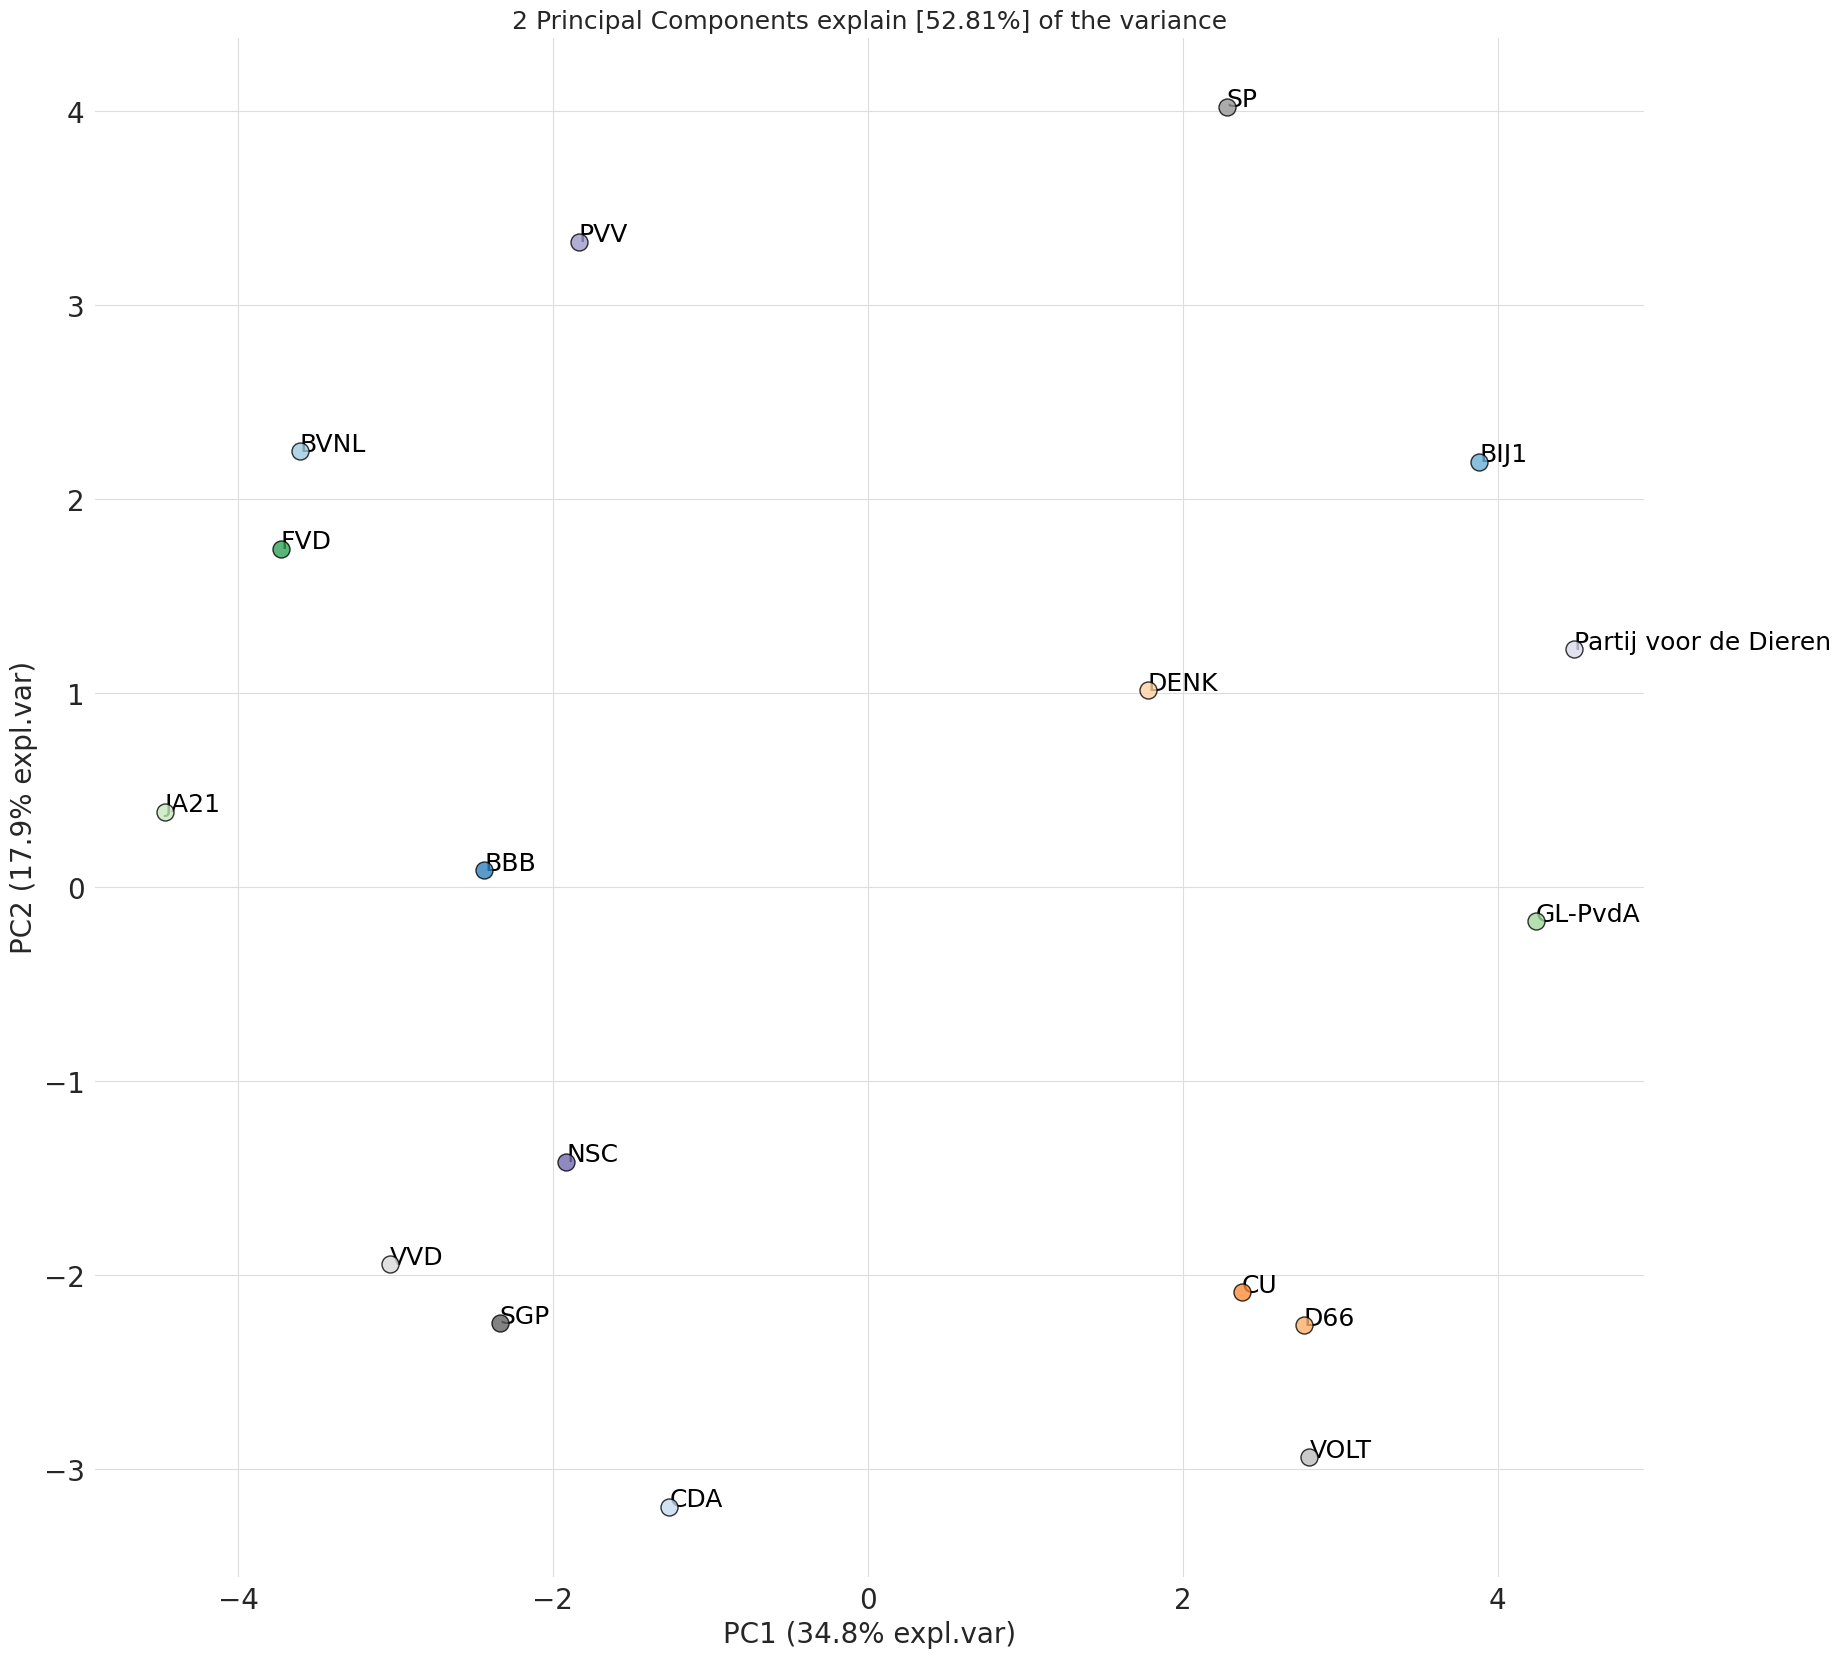

In [14]:
model = pca(n_components=2)
results = model.fit_transform(stemwijzer_df_prepared, row_labels=stemwijzer_labels)
model.scatter(legend=False, figsize=(20,20), labels=stemwijzer_labels)

#### 3d

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2000x2000 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [63.03%] of the variance'}, xlabel='PC1 (34.8% expl.var)', ylabel='PC2 (17.9% expl.var)', zlabel='PC3 (10.2% expl.var)'>)

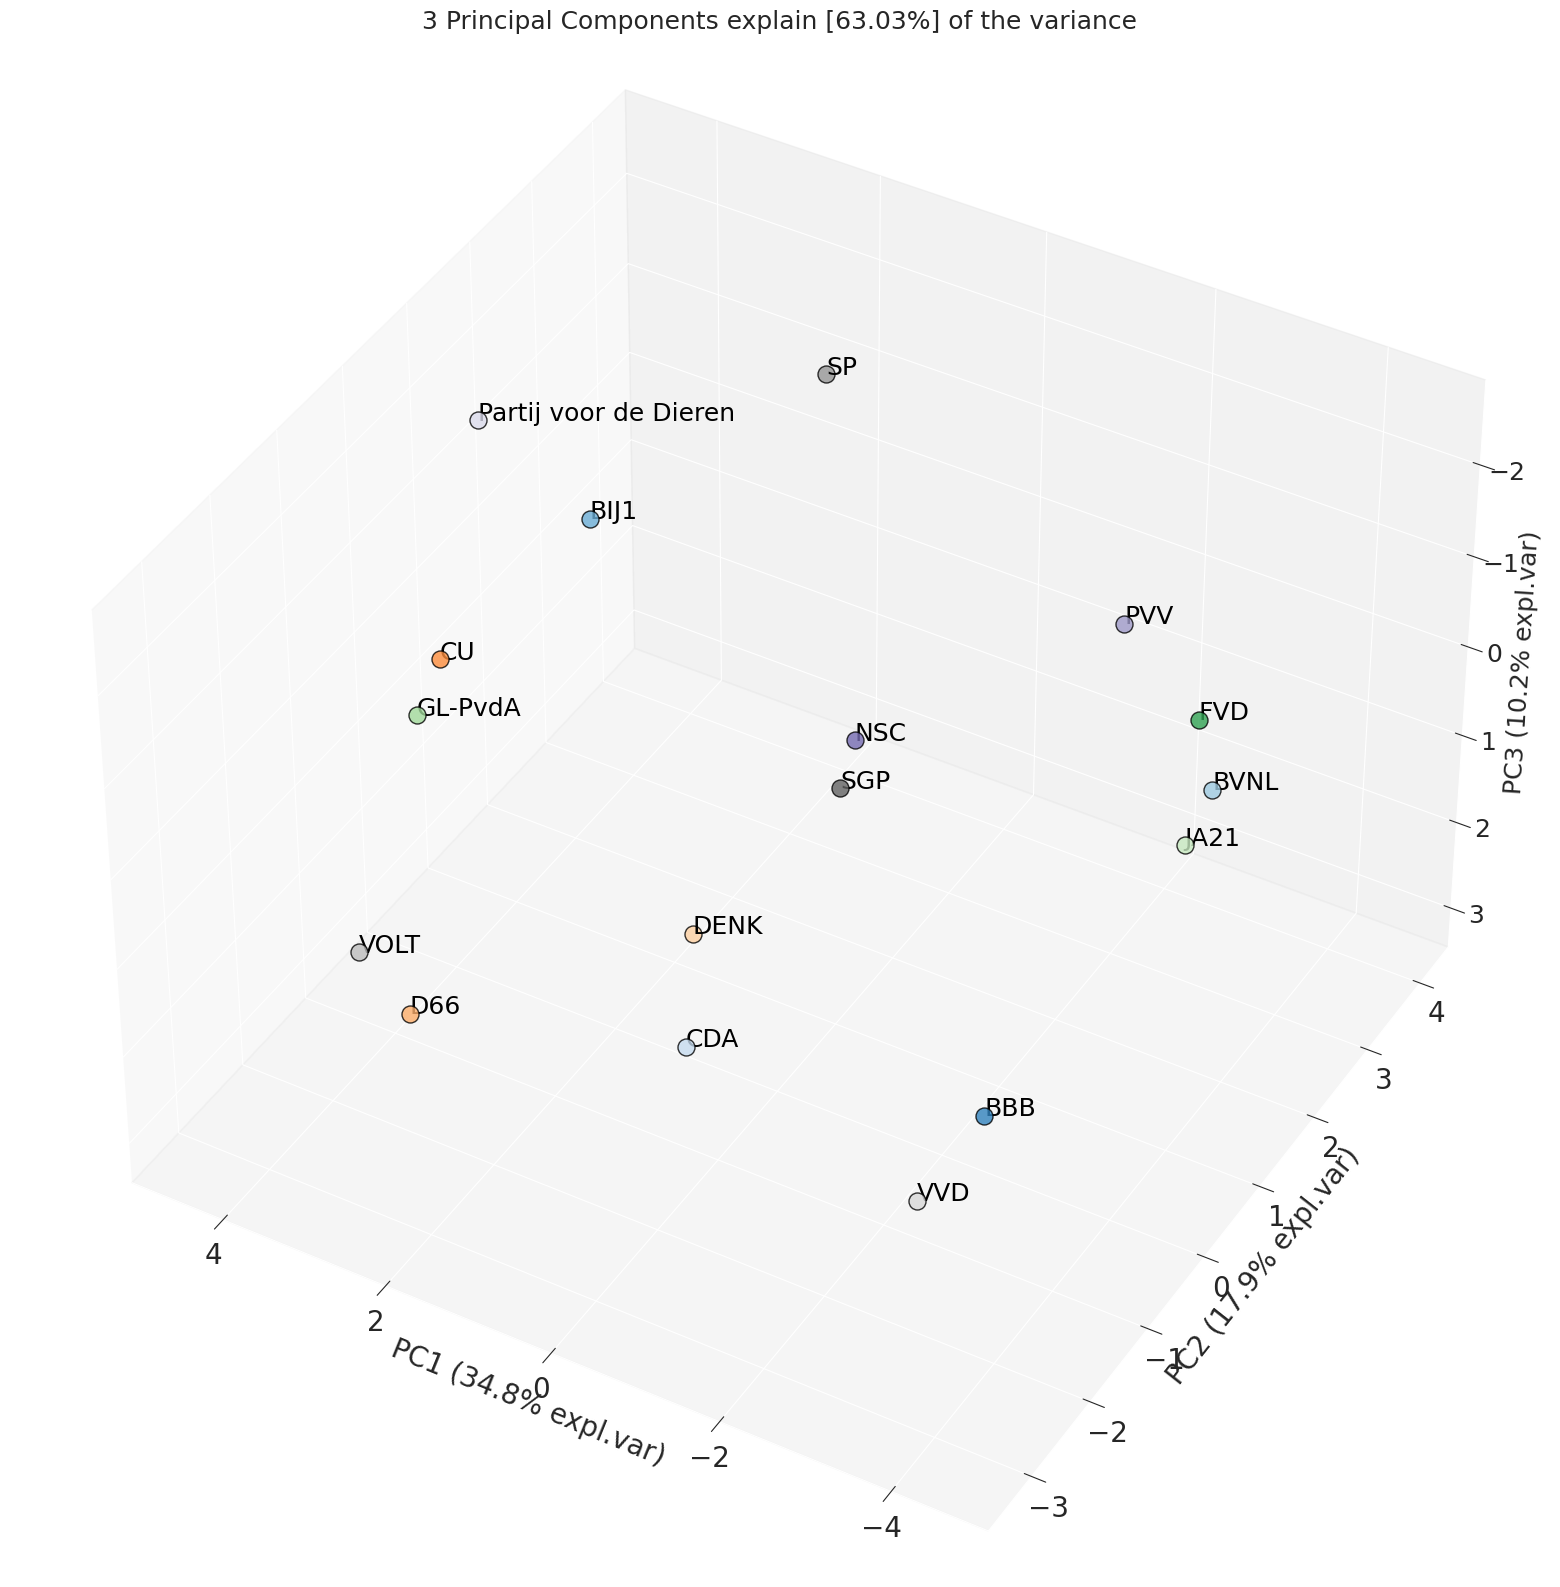

In [15]:
model = pca(n_components=3)
results = model.fit_transform(stemwijzer_df_prepared, row_labels=stemwijzer_labels)
model.scatter3d(legend=False, figsize=(20,20), labels=stemwijzer_labels)

### Analyse componenten

/tmp/ipykernel_13280/279368595.py:4: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


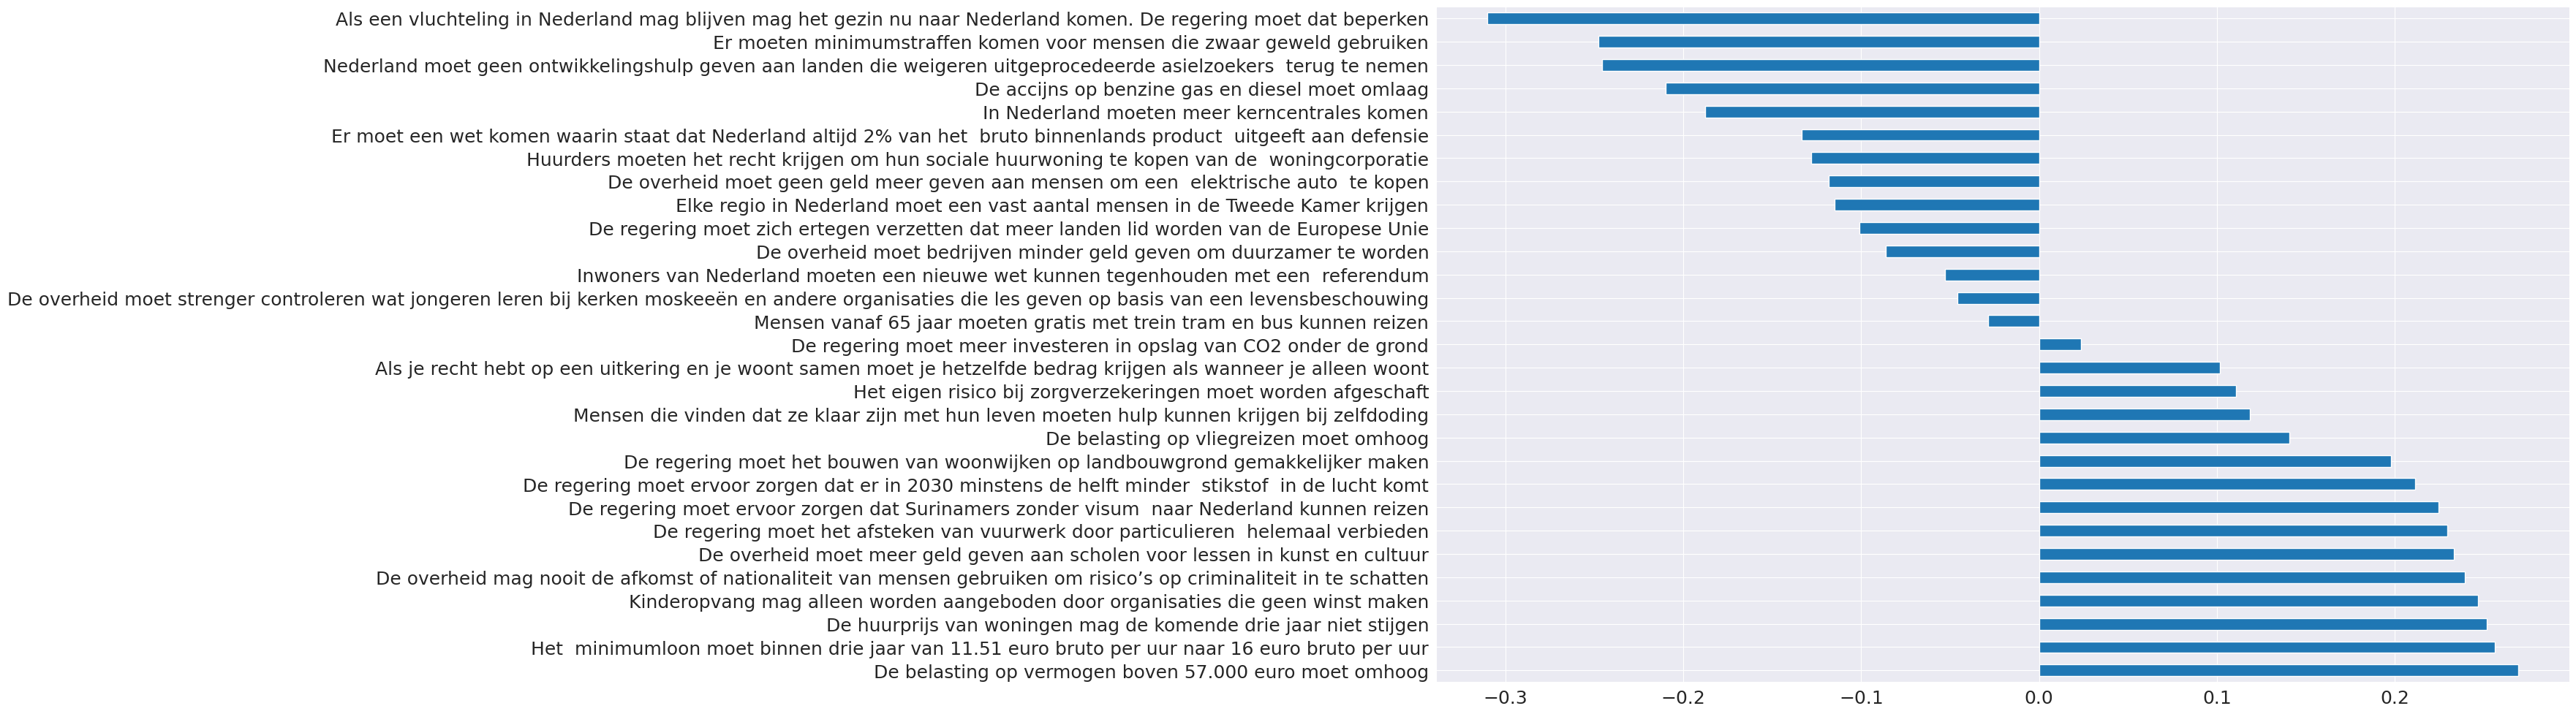

In [16]:
component_df = model.results["loadings"].iloc[0].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20,12))
component_df.plot.barh(ax=ax)
fig.tight_layout()

/tmp/ipykernel_13280/845681879.py:4: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


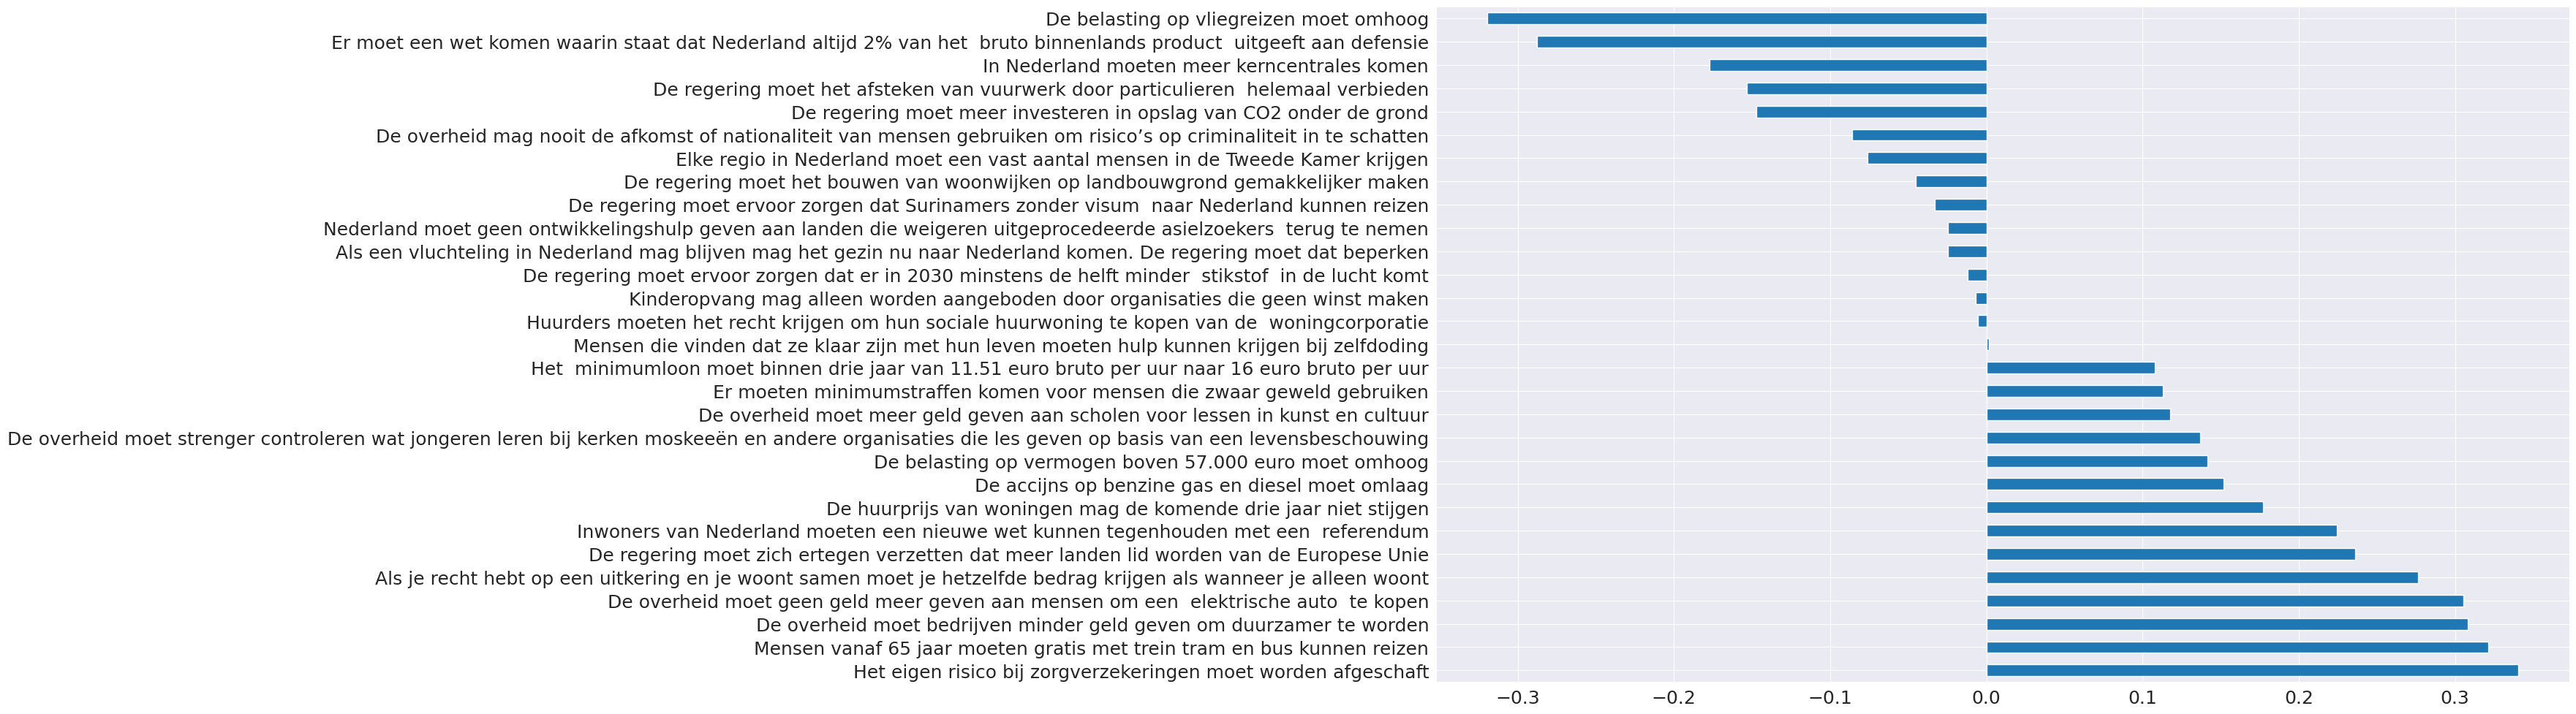

In [17]:
component_df = model.results["loadings"].iloc[1].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20,12))
component_df.plot.barh(ax=ax)
fig.tight_layout()

### Correlatie standpunten van de partijen

<Axes: >

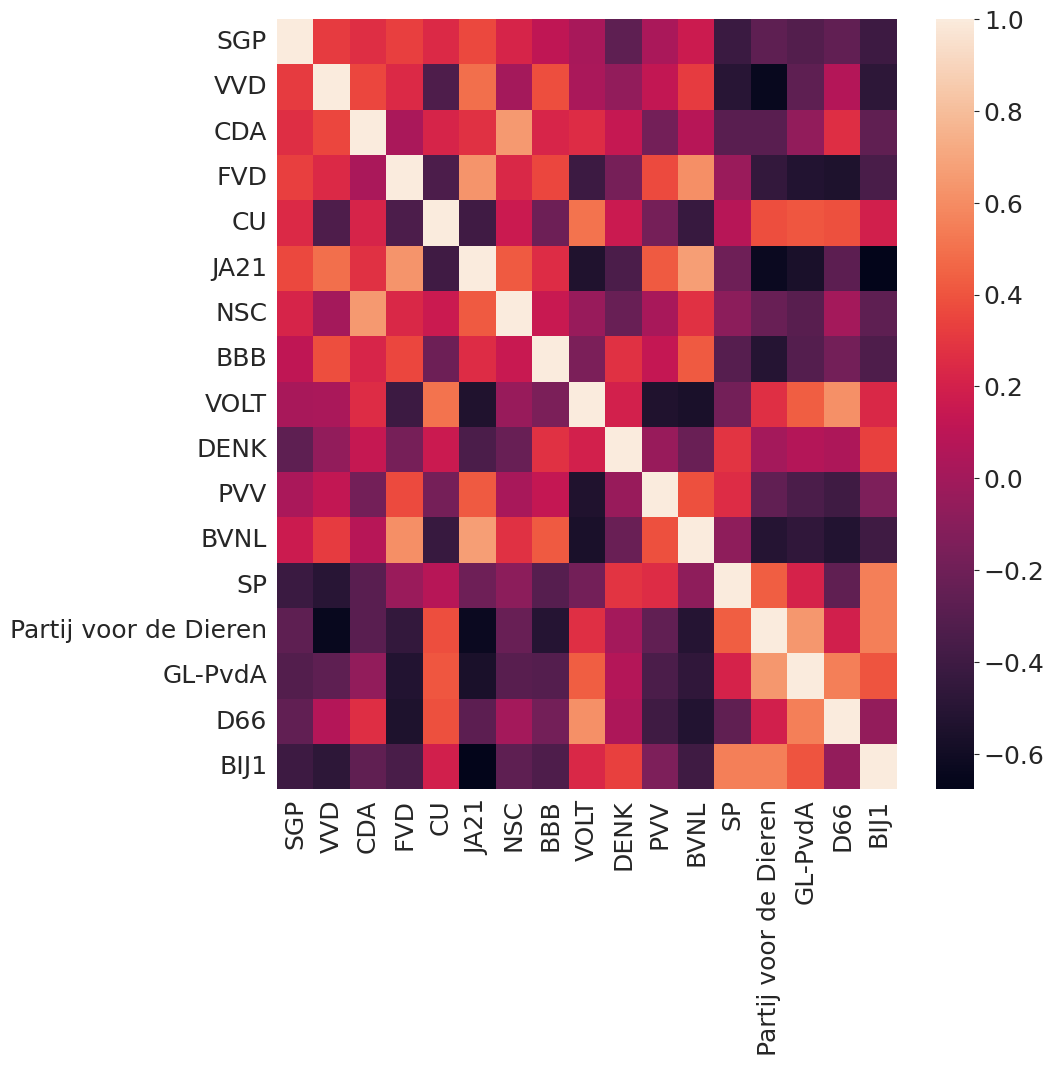

In [18]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(stemwijzer_df.corr())

In [19]:
stemwijzer_df.corr()

SGP       VVD       CDA       FVD        CU  \
SGP                    1.000000  0.312527  0.264683  0.330086  0.242056   
VVD                    0.312527  1.000000  0.353273  0.240300 -0.330514   
CDA                    0.264683  0.353273  1.000000  0.028989  0.217078   
FVD                    0.330086  0.240300  0.028989  1.000000 -0.341309   
CU                     0.242056 -0.330514  0.217078 -0.341309  1.000000   
JA21                   0.358273  0.490025  0.273402  0.631187 -0.394748   
NSC                    0.219330  0.009855  0.650516  0.239237  0.158676   
BBB                    0.113996  0.380019  0.226604  0.354436 -0.207762   
VOLT                   0.022939  0.029053  0.257603 -0.410337  0.507557   
DENK                  -0.264683 -0.064684  0.137255 -0.169100  0.157640   
PVV                    0.027696  0.127558 -0.180962  0.366624 -0.174902   
BVNL                   0.164488  0.318182  0.079611  0.613010 -0.430193   
SP                    -0.421332 -0.497568 -0.289216 -0.028989  0.082696   
Partij voor de Dieren -0.264683 -0.641863 -0.289216 -0.449323  0.382471   
GL-PvdA               -0.312527 -0.267677 -0.064684 -0.524737  0.406585   
D66                   -0.253024  0.063564  0.260927 -0.545205  0.385162   
BIJ1                  -0.404716 -0.476072 -0.263048 -0.349760  0.188390   

                           JA21       NSC       BBB      VOLT      DENK  \
SGP                    0.358273  0.219330  0.113996  0.022939 -0.264683   
VVD                    0.490025  0.009855  0.380019  0.029053 -0.064684   
CDA                    0.273402  0.650516  0.226604  0.257603  0.137255   
FVD                    0.631187  0.239237  0.354436 -0.410337 -0.169100   
CU                    -0.394748  0.158676 -0.207762  0.507557  0.157640   
JA21                   1.000000  0.417118  0.256188 -0.533440 -0.344832   
NSC                    0.417118  1.000000  0.148796 -0.041231 -0.228166   
BBB                    0.256188  0.148796  1.000000 -0.149049  0.273402   
VOLT                  -0.533440 -0.041231 -0.149049  1.000000  0.195154   
DENK                  -0.344832 -0.228166  0.273402  0.195154  1.000000   
PVV                    0.418015  0.022402  0.131340 -0.533654 -0.037700   
BVNL                   0.670034  0.275946  0.417521 -0.565213 -0.223906   
SP                    -0.201973 -0.087383 -0.298033 -0.182143  0.289216   
Partij voor de Dieren -0.630550 -0.228166 -0.512321  0.270613  0.004902   
GL-PvdA               -0.562528 -0.295656 -0.307515  0.430512  0.064684   
D66                   -0.275326  0.005168 -0.180929  0.617731  0.041748   
BIJ1                  -0.677076 -0.270336 -0.335421  0.234474  0.335013   

                            PVV      BVNL        SP  Partij voor de Dieren  \
SGP                    0.027696  0.164488 -0.421332              -0.264683   
VVD                    0.127558  0.318182 -0.497568              -0.641863   
CDA                   -0.180962  0.079611 -0.289216              -0.289216   
FVD                    0.366624  0.613010 -0.028989              -0.449323   
CU                    -0.174902 -0.430193  0.082696               0.382471   
JA21                   0.418015  0.670034 -0.201973              -0.630550   
NSC                    0.022402  0.275946 -0.087383              -0.228166   
BBB                    0.131340  0.417521 -0.298033              -0.512321   
VOLT                  -0.533654 -0.565213 -0.182143               0.270613   
DENK                  -0.037700 -0.223906  0.289216               0.004902   
PVV                    1.000000  0.390326  0.253849              -0.256362   
BVNL                   0.390326  1.000000 -0.079611              -0.512495   
SP                     0.253849 -0.079611  1.000000               0.431373   
Partij voor de Dieren -0.256362 -0.512495  0.431373               1.000000   
GL-PvdA               -0.349508 -0.464646  0.208979               0.641863   
D66                   -0.398675 -0.524404 -0.260927               0.193086   


## 2.3 StemmenTracker

Gemaakt door de organisatie achter de **StemWijzer*, onderscheid de [StemmenTracker](https://www.stemmentracker.nl/) zich door net als **Check je stem** het stemgedrag van de partijen als data te gebruiken. De StemmenTracker loopt in mindere mate tegen het zelfde probleem als **Check je stem** aan, namelijk dat zowel BIJ1 (4) als de NSC (4) niet bij alle stemmingen aanwezig waren.

Omdat de afwezigheid van beide partijen geen overlap heeft, zou ik van de 30 stellingen er 8 moeten weggooien om beide partijen mee te nemen. Ik heb er daarom voor gekozen om ook hier BIJ1 weg te laten maar NSC wel mee te nemen. Hierdoor blijven er 26 stellingen over.

Het stemgedrag van Groenlinks en de PvdA had 100% overlap en zijn daarom samengevoegd tot de 'GL-PvdA' combinatie waarmee ze in de verkiezingen ook op de lijst staan.



In [20]:
# Load data and prepare DataFrame for analysis
stemmen_tracker_df = pd.read_csv('data/stemmentracker.csv')
stemmen_tracker_df = stemmen_tracker_df.drop("BIJ1", axis=1)
stemmen_tracker_df = stemmen_tracker_df.dropna(axis=0)
stemmen_tracker_labels = stemmen_tracker_df.columns[1:]
stemmen_tracker_df =stemmen_tracker_df.iloc[1:]
stemmen_tracker_questions = stemmen_tracker_df["Motie"]
stemmen_tracker_df = stemmen_tracker_df.iloc[:, 1:]

# Prepared DataFrame is assigned its own variable to allow the original to be used in the Merged model.
stemmen_tracker_df_prepared = pd.DataFrame(data=stemmen_tracker_df, columns=stemmen_tracker_labels)
stemmen_tracker_df_prepared = stemmen_tracker_df_prepared.rename(index=stemmen_tracker_questions)
stemmen_tracker_df_prepared = stemmen_tracker_df_prepared.transpose()

### Verklaarde variantie per component

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [25] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 5 Principal Components explain [79.57%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

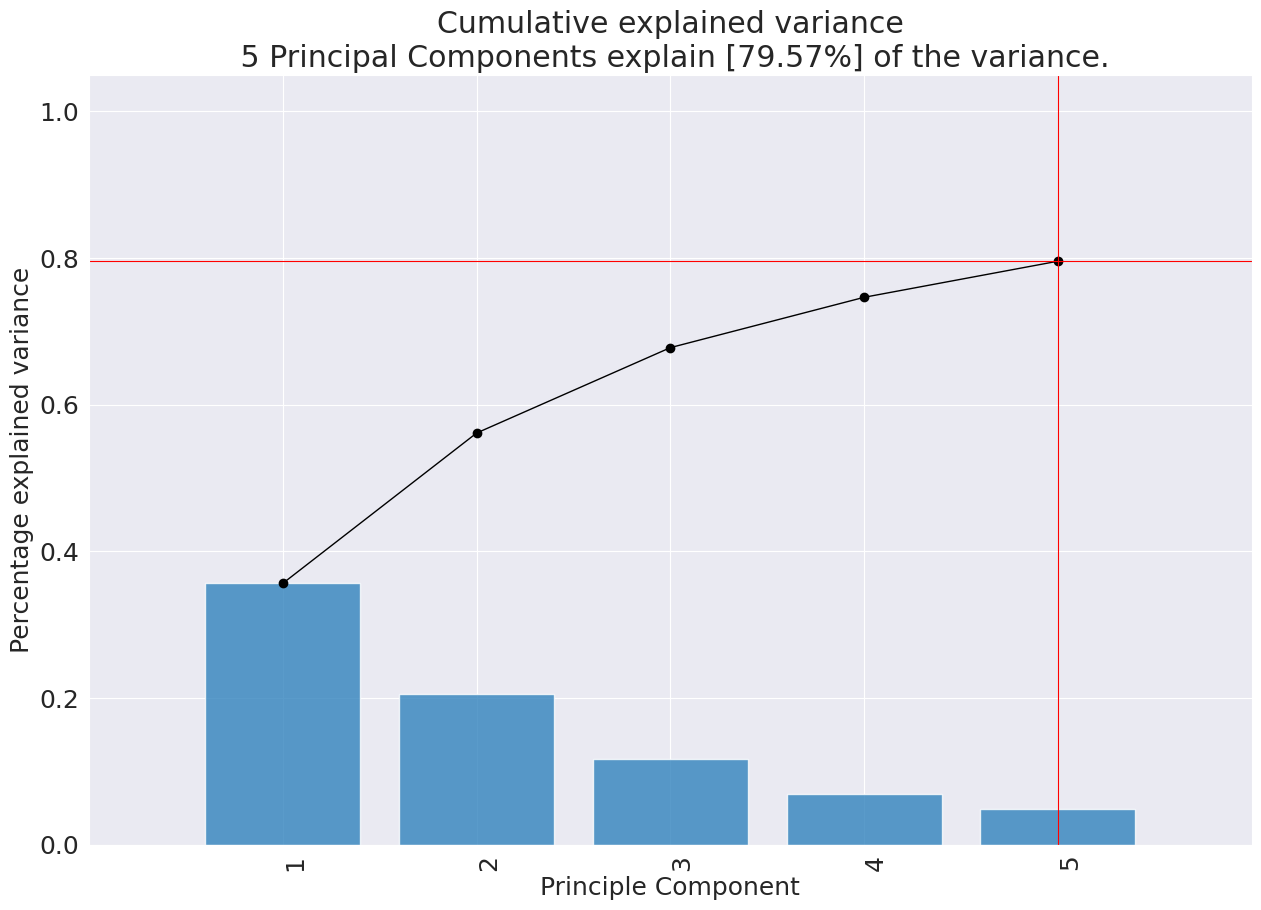

In [21]:
model = pca(n_components=5)
results = model.fit_transform(stemmen_tracker_df_prepared, row_labels=stemmen_tracker_labels)
model.plot()

### Visualisatie van de posities van de partijen

#### 1d

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [25] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': '1d Grafiek (diagonaal vanwege leesbaarheid)'}, xlabel='PC1 (35.6% expl.var)', ylabel='PC1 (35.6% expl.var)'>)

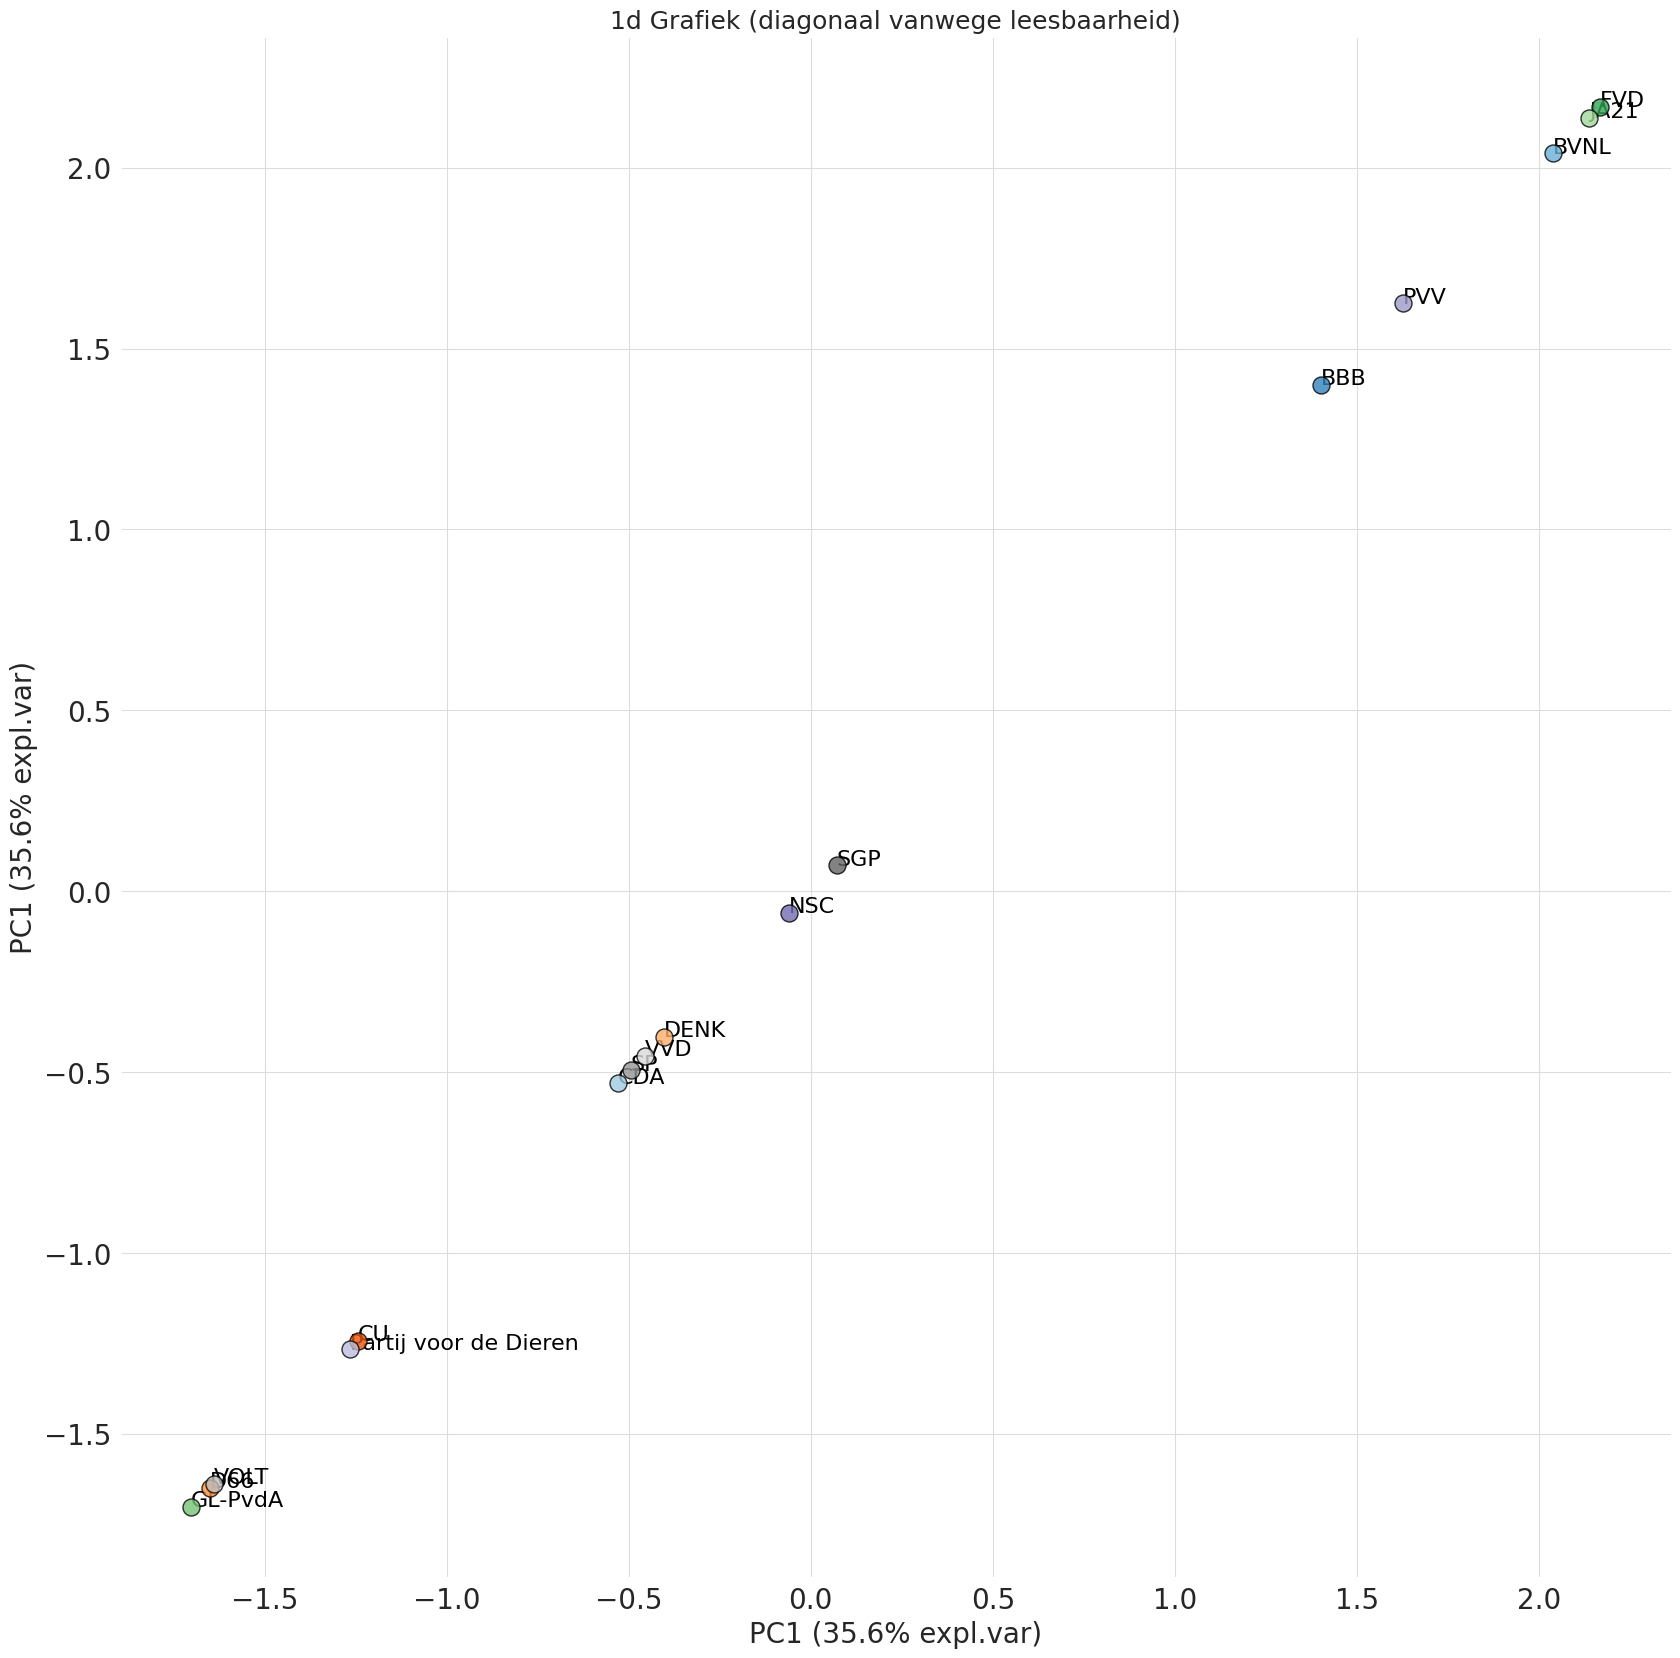

In [22]:
model = pca(n_components=2)
results = model.fit_transform(stemmen_tracker_df_prepared, row_labels=stemmen_tracker_labels)
model.scatter(legend=False, figsize=(20,20), labels=stemmen_tracker_labels, PC=(0,0), fontsize=16, title="1d Grafiek (diagonaal vanwege leesbaarheid)")


#### 2d

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [25] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [56.14%] of the variance'}, xlabel='PC1 (35.6% expl.var)', ylabel='PC2 (20.4% expl.var)'>)

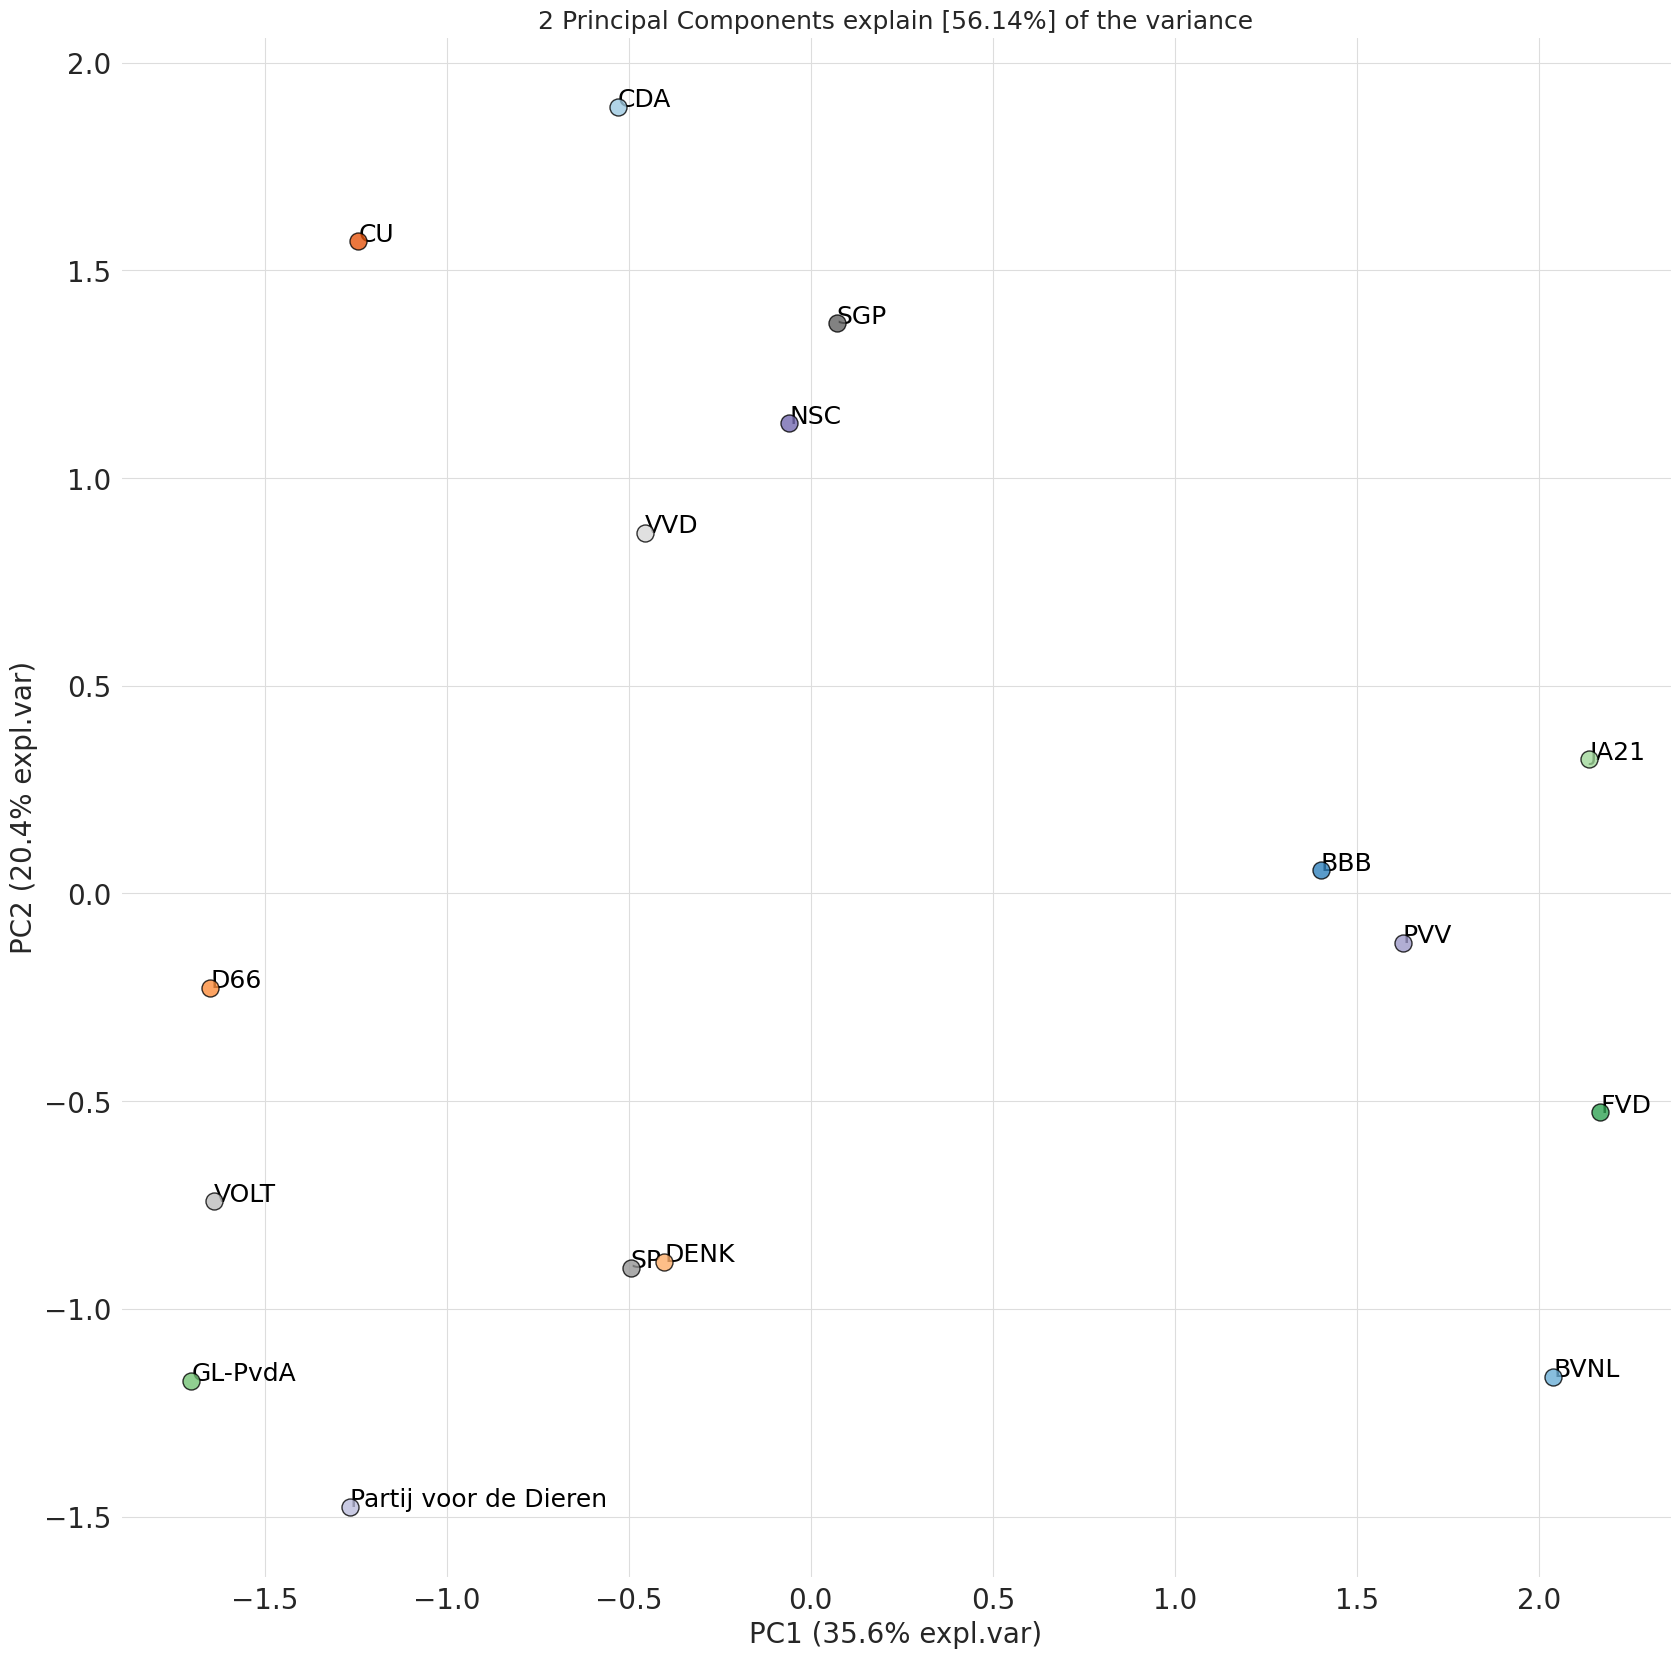

In [23]:
model = pca(n_components=2)
results = model.fit_transform(stemmen_tracker_df_prepared, row_labels=stemmen_tracker_labels)
model.scatter(legend=False, figsize=(20,20), labels=stemmen_tracker_labels)

#### 3d

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [25] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


(<Figure size 2000x2000 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [67.78%] of the variance'}, xlabel='PC1 (35.6% expl.var)', ylabel='PC2 (20.4% expl.var)', zlabel='PC3 (11.6% expl.var)'>)

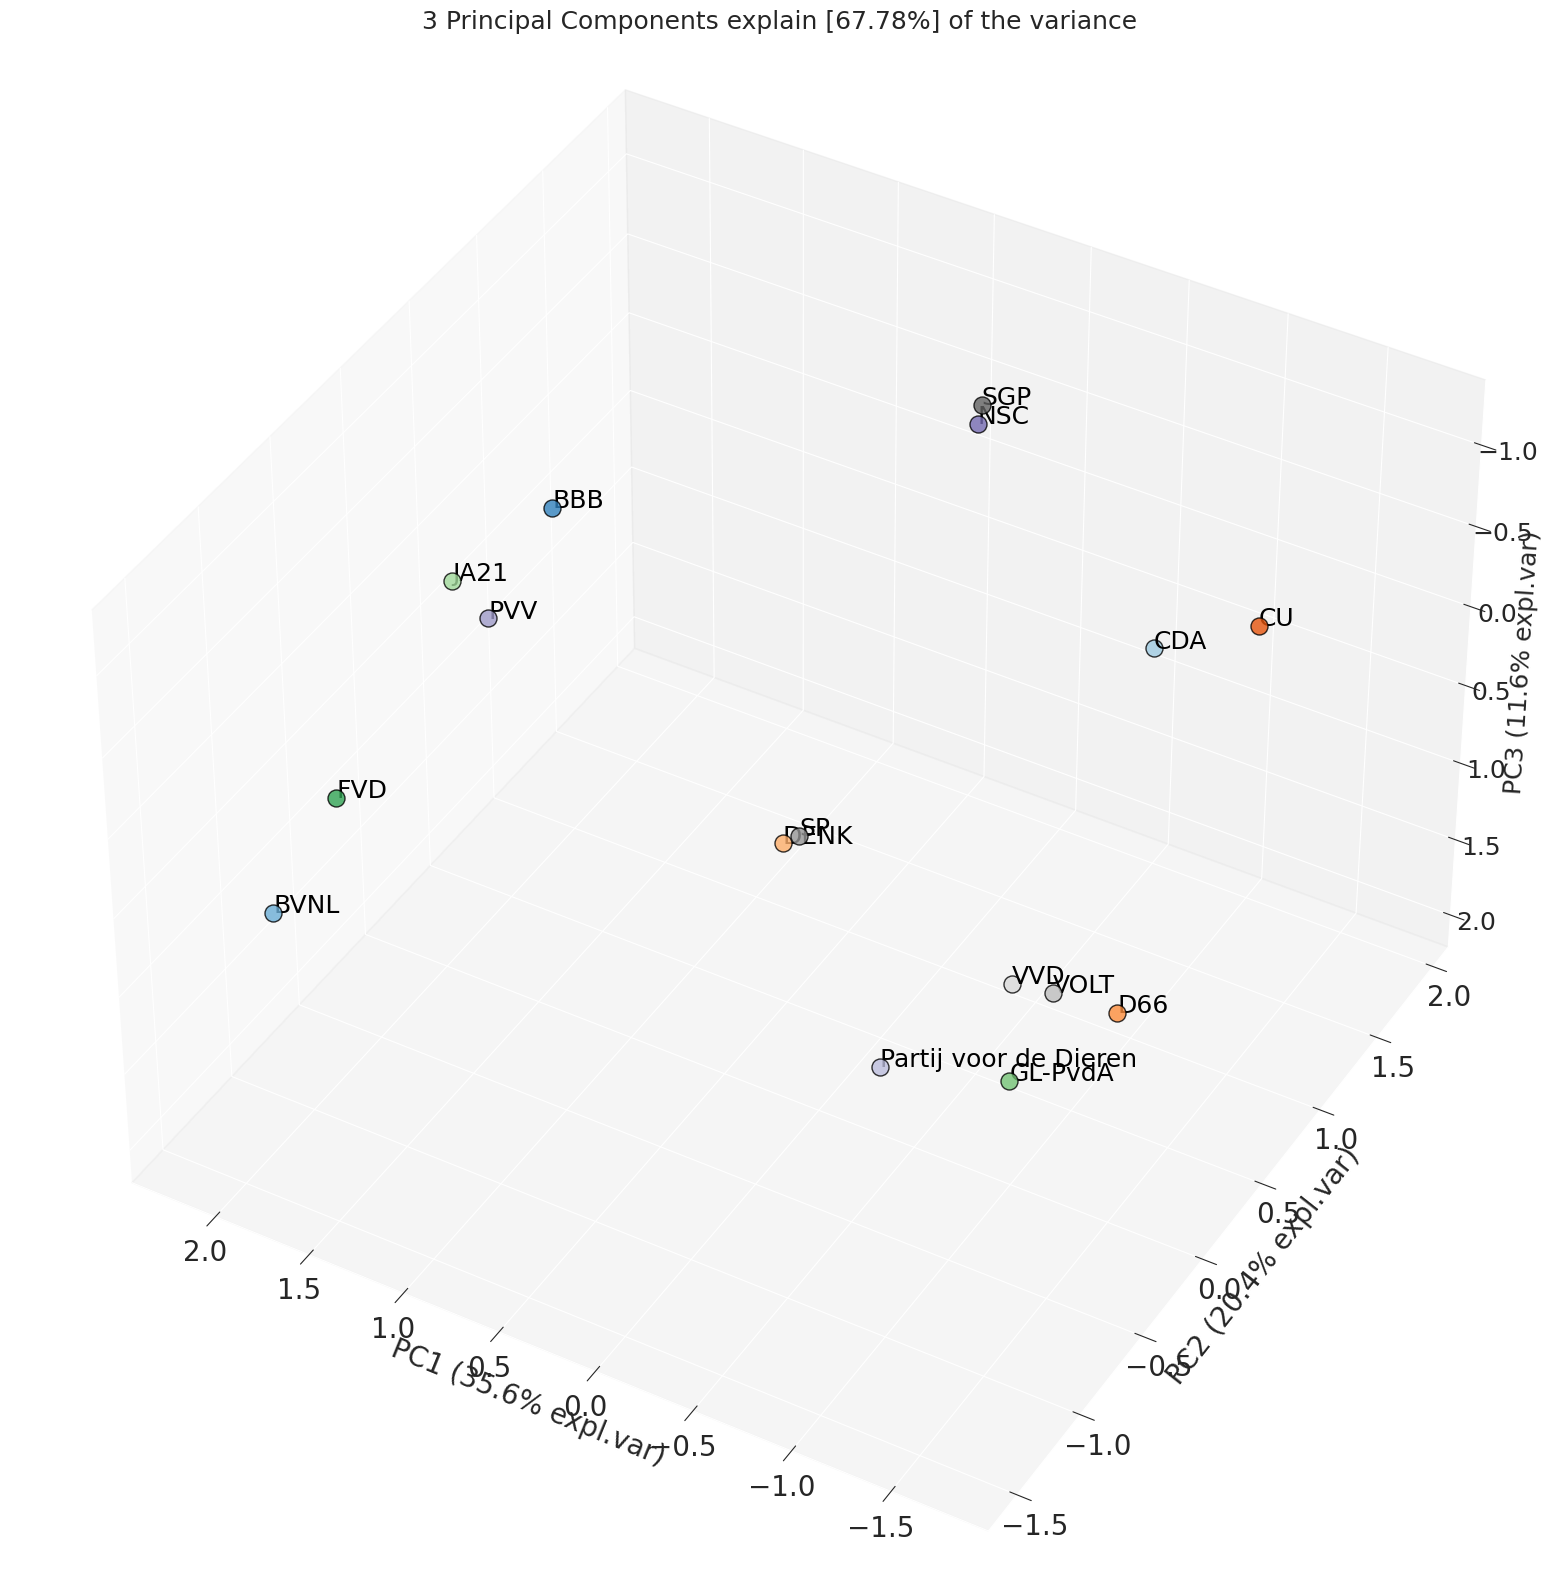

In [24]:
model = pca(n_components=3)
results = model.fit_transform(stemmen_tracker_df_prepared, row_labels=stemmen_tracker_labels)
model.scatter3d(legend=False, figsize=(20,20), labels=stemmen_tracker_labels)

### Analyse componenten

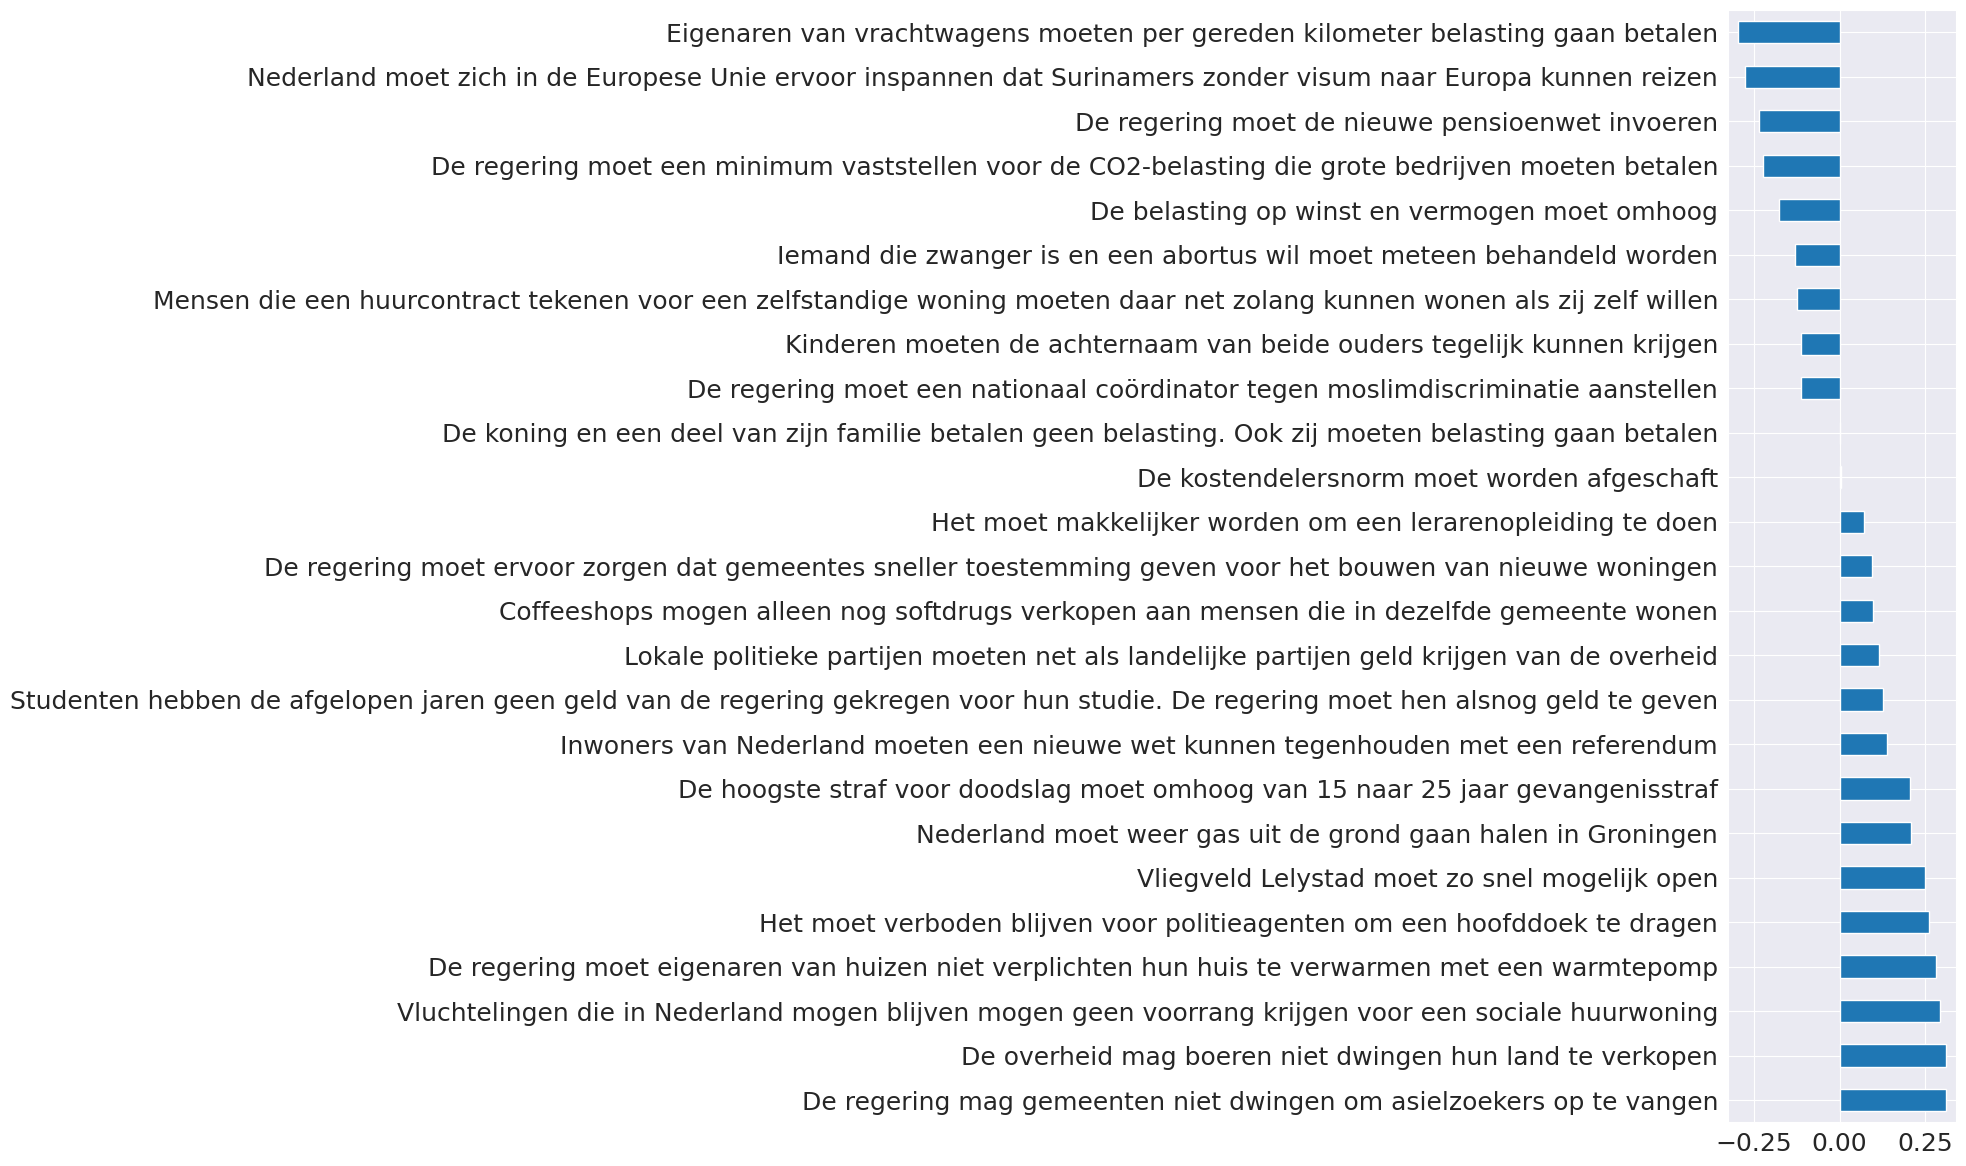

In [25]:
component_df = model.results["loadings"].iloc[0].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20,12))
component_df.plot.barh(ax=ax)
fig.tight_layout()

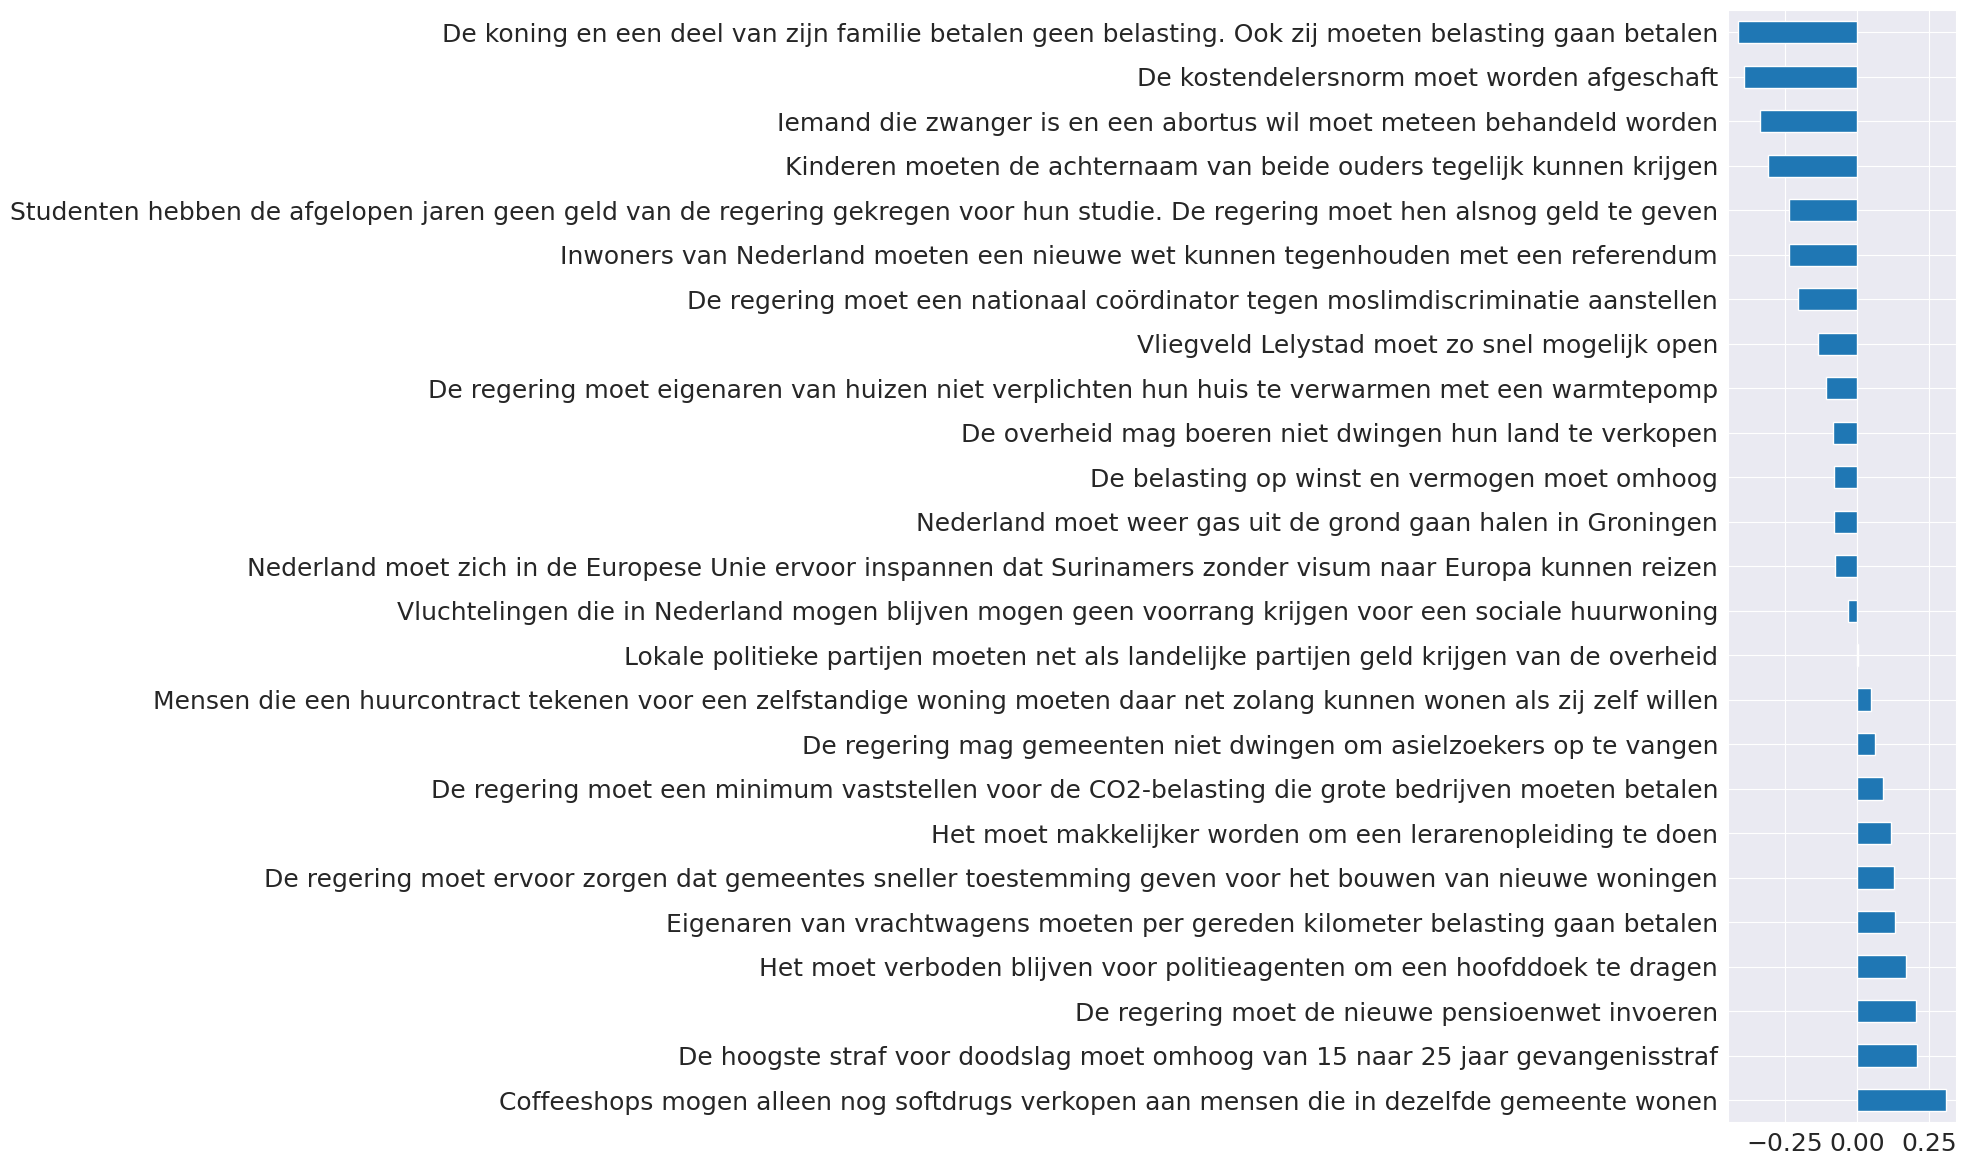

In [26]:
component_df = model.results["loadings"].iloc[1].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20,12))
component_df.plot.barh(ax=ax)
fig.tight_layout()

### Correlatie stemgedrag van de partijen

<Axes: >

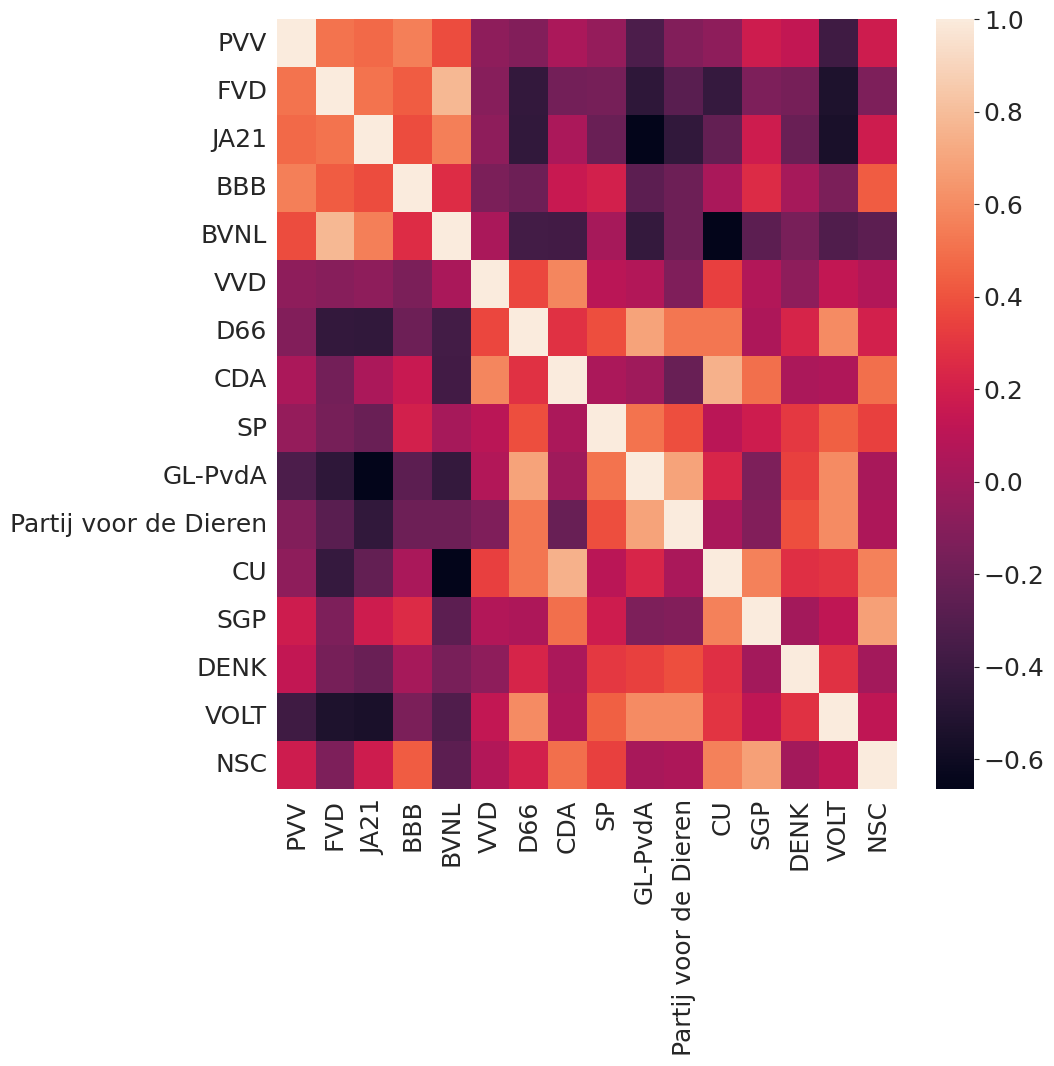

In [27]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(stemmen_tracker_df.corr())

In [28]:
stemmen_tracker_df.corr()

PVV       FVD      JA21       BBB      BVNL  \
PVV                    1.000000  0.510355  0.479167  0.557370  0.378726   
FVD                    0.510355  1.000000  0.510355  0.428412  0.773906   
JA21                   0.479167  0.510355  1.000000  0.378726  0.557370   
BBB                    0.557370  0.428412  0.378726  1.000000  0.264706   
BVNL                   0.378726  0.773906  0.557370  0.264706  1.000000   
VVD                   -0.068041 -0.098693 -0.068041 -0.140028  0.035007   
D66                   -0.113424 -0.438719 -0.447024 -0.199098 -0.370734   
CDA                    0.041667 -0.174595  0.041667  0.157207 -0.378726   
SP                    -0.041667 -0.161165 -0.215278  0.200082  0.021437   
GL-PvdA               -0.329044 -0.461039 -0.664804 -0.262575 -0.435322   
Partij voor de Dieren -0.113424 -0.277425 -0.447024 -0.199098 -0.199098   
CU                    -0.068041 -0.427669 -0.238145  0.035007 -0.665133   
SGP                    0.174595 -0.136364  0.174595  0.255665 -0.262575   
DENK                   0.131944 -0.161165 -0.215278  0.021437 -0.157207   
VOLT                  -0.386976 -0.529043 -0.553777 -0.144174 -0.315810   
NSC                    0.174595 -0.136364  0.174595  0.428412 -0.262575   

                            VVD       D66       CDA        SP   GL-PvdA  \
PVV                   -0.068041 -0.113424  0.041667 -0.041667 -0.329044   
FVD                   -0.098693 -0.438719 -0.174595 -0.161165 -0.461039   
JA21                  -0.068041 -0.447024  0.041667 -0.215278 -0.664804   
BBB                   -0.140028 -0.199098  0.157207  0.200082 -0.262575   
BVNL                   0.035007 -0.370734 -0.378726  0.021437 -0.435322   
VVD                    1.000000  0.359546  0.578352  0.102062  0.065795   
D66                    0.359546  1.000000  0.280224  0.386976  0.690337   
CDA                    0.578352  0.280224  1.000000  0.041667 -0.006715   
SP                     0.102062  0.386976  0.041667  1.000000  0.510355   
GL-PvdA                0.065795  0.690337 -0.006715  0.510355  1.000000   
Partij voor de Dieren -0.130744  0.519231 -0.220176  0.386976  0.690337   
CU                     0.333333  0.522976  0.748455  0.102062  0.230283   
SGP                    0.065795  0.045162  0.496924  0.174595 -0.136364   
DENK                  -0.068041  0.220176  0.041667  0.305556  0.342475   
VOLT                   0.130744  0.602564  0.053376  0.447024  0.600012   
NSC                    0.065795  0.206456  0.496924  0.342475  0.025974   

                       Partij voor de Dieren        CU       SGP      DENK  \
PVV                                -0.113424 -0.068041  0.174595  0.131944   
FVD                                -0.277425 -0.427669 -0.136364 -0.161165   
JA21                               -0.447024 -0.238145  0.174595 -0.215278   
BBB                                -0.199098  0.035007  0.255665  0.021437   
BVNL                               -0.199098 -0.665133 -0.262575 -0.157207   
VVD                                -0.130744  0.333333  0.065795 -0.068041   
D66                                 0.519231  0.522976  0.045162  0.220176   
CDA                                -0.220176  0.748455  0.496924  0.041667   
SP                                  0.386976  0.102062  0.174595  0.305556   
GL-PvdA                             0.690337  0.230283 -0.136364  0.342475   
Partij voor de Dieren               1.000000  0.032686 -0.116131  0.386976   
CU                                  0.032686  1.000000  0.559259  0.272166   
SGP                                -0.116131  0.559259  1.000000  0.006715   
DENK                                0.386976  0.272166  0.006715  1.000000   
VOLT                                0.602564  0.294174  0.116131  0.280224   
NSC                                 0.045162  0.559259  0.675325  0.006715   

                           VOLT       NSC  
PVV                   -0.386976  0.174595  
FVD                   -0.529043 -0.136364  
JA21             

## 2.4 Kieskompas

Het [Kieskompas](https://www.kieskompas.nl/) is een stemwijzer gemaakt door de krant Trouw met 30 stellingen. De partijen worden na afloop op een 2d grafiek geplaatst met 'links/ rechts' en 'progressief / conservatief' als assen.

De vragen worden op een [Likert scale](https://en.wikipedia.org/wiki/Likert_scale) beantwoord met -2, -1, 0, 1 en 2. Het Kieskompas bevat ook de optie 'geen mening' maar deze is door geen van de partijen gebruikt en is daarom niet meegenomen in de codering.

In [29]:
# Load data and prepare DataFrame for analysis
kieskompas_df = pd.read_csv('data/kieskompas.csv')
kieskompas_df = kieskompas_df.dropna(axis=1)
kieskompas_df_labels = kieskompas_df.columns[1:]
kieskompas_df =kieskompas_df.iloc[1:]
kieskompas_df_questions = kieskompas_df["stelling (-2; -1; 0=neutraal; 1; 2)"]
kieskompas_df = kieskompas_df.iloc[:, 1:]

# Prepared DataFrame is assigned its own variable to allow the original to be used in the Merged model.
kieskompas_df_prepared = pd.DataFrame(data=kieskompas_df, columns=kieskompas_df_labels)
kieskompas_df_prepared = kieskompas_df_prepared.rename(index=kieskompas_df_questions)
kieskompas_df_prepared = kieskompas_df_prepared.transpose()

### Verklaarde variantie per component

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 5 Principal Components explain [91.70%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

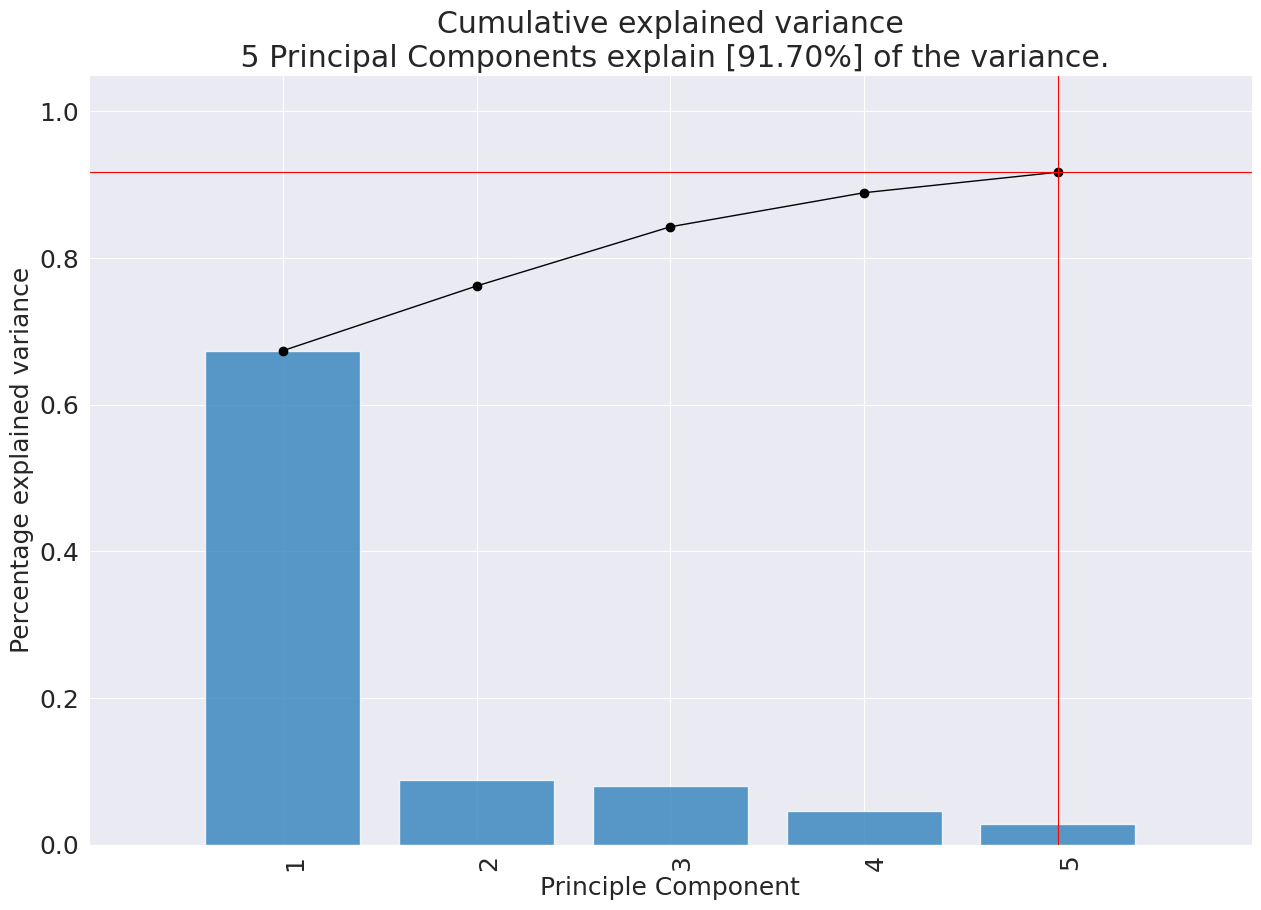

In [30]:
model = pca(n_components=5)
results = model.fit_transform(kieskompas_df_prepared, row_labels=kieskompas_df_labels)
model.plot()

### Visualisatie van de posities van de partijen

#### 1d

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': '1d Grafiek (diagonaal vanwege leesbaarheid)'}, xlabel='PC1 (67.3% expl.var)', ylabel='PC1 (67.3% expl.var)'>)

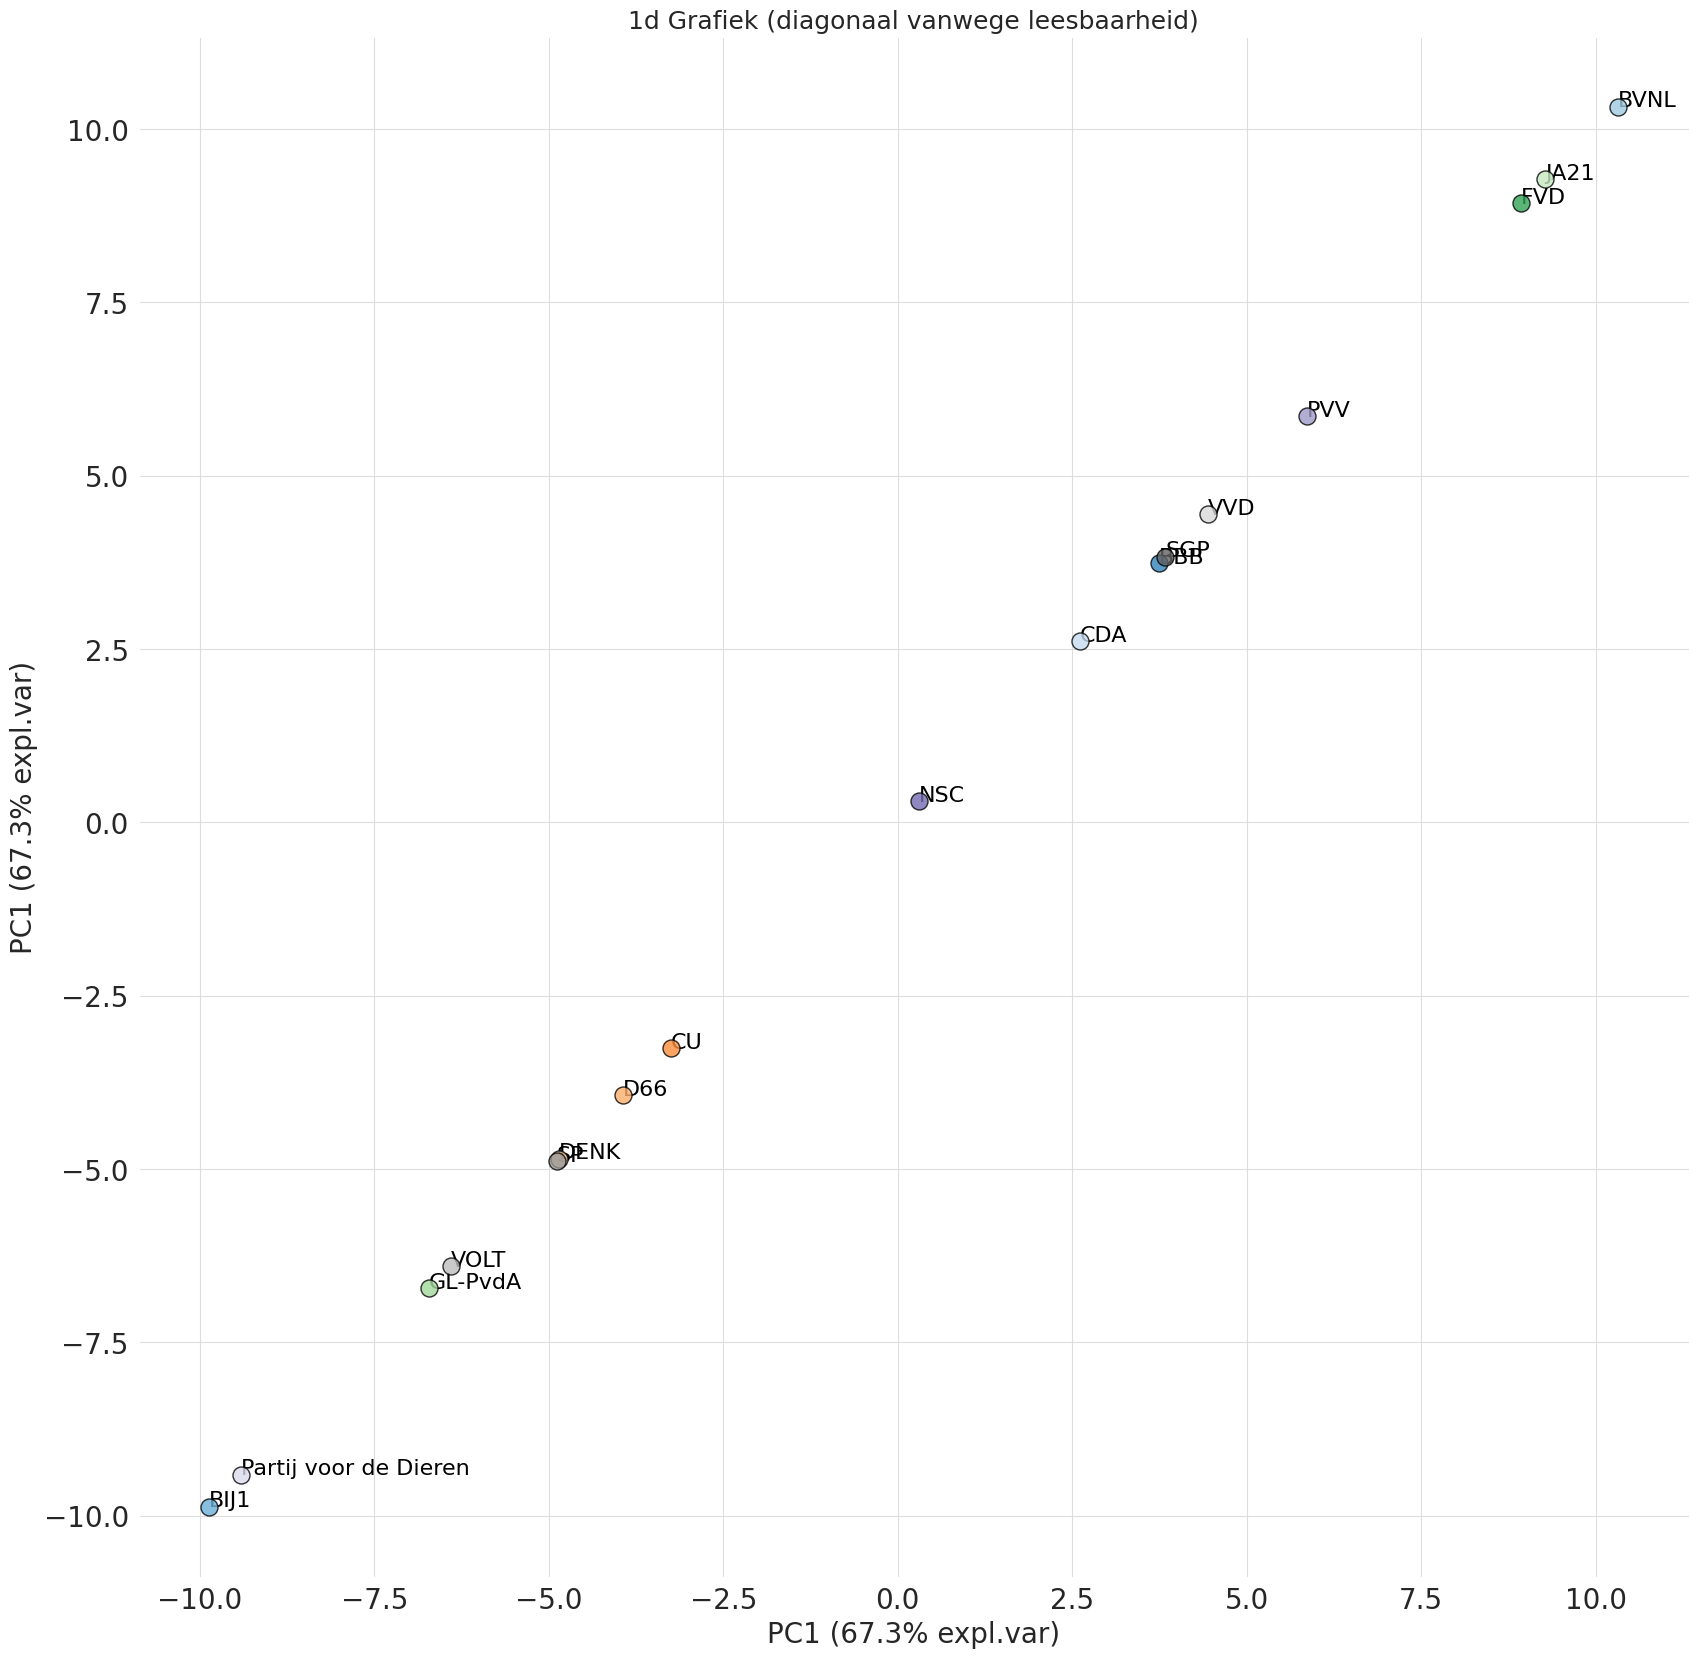

In [31]:
model = pca(n_components=2)
results = model.fit_transform(kieskompas_df_prepared, row_labels=kieskompas_df_labels)
model.scatter(legend=False, figsize=(20,20), labels=kieskompas_df_labels, PC=(0,0), fontsize=16, title="1d Grafiek (diagonaal vanwege leesbaarheid)")

#### 2d

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2000x2000 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [76.19%] of the variance'}, xlabel='PC1 (67.3% expl.var)', ylabel='PC2 (8.82% expl.var)'>)

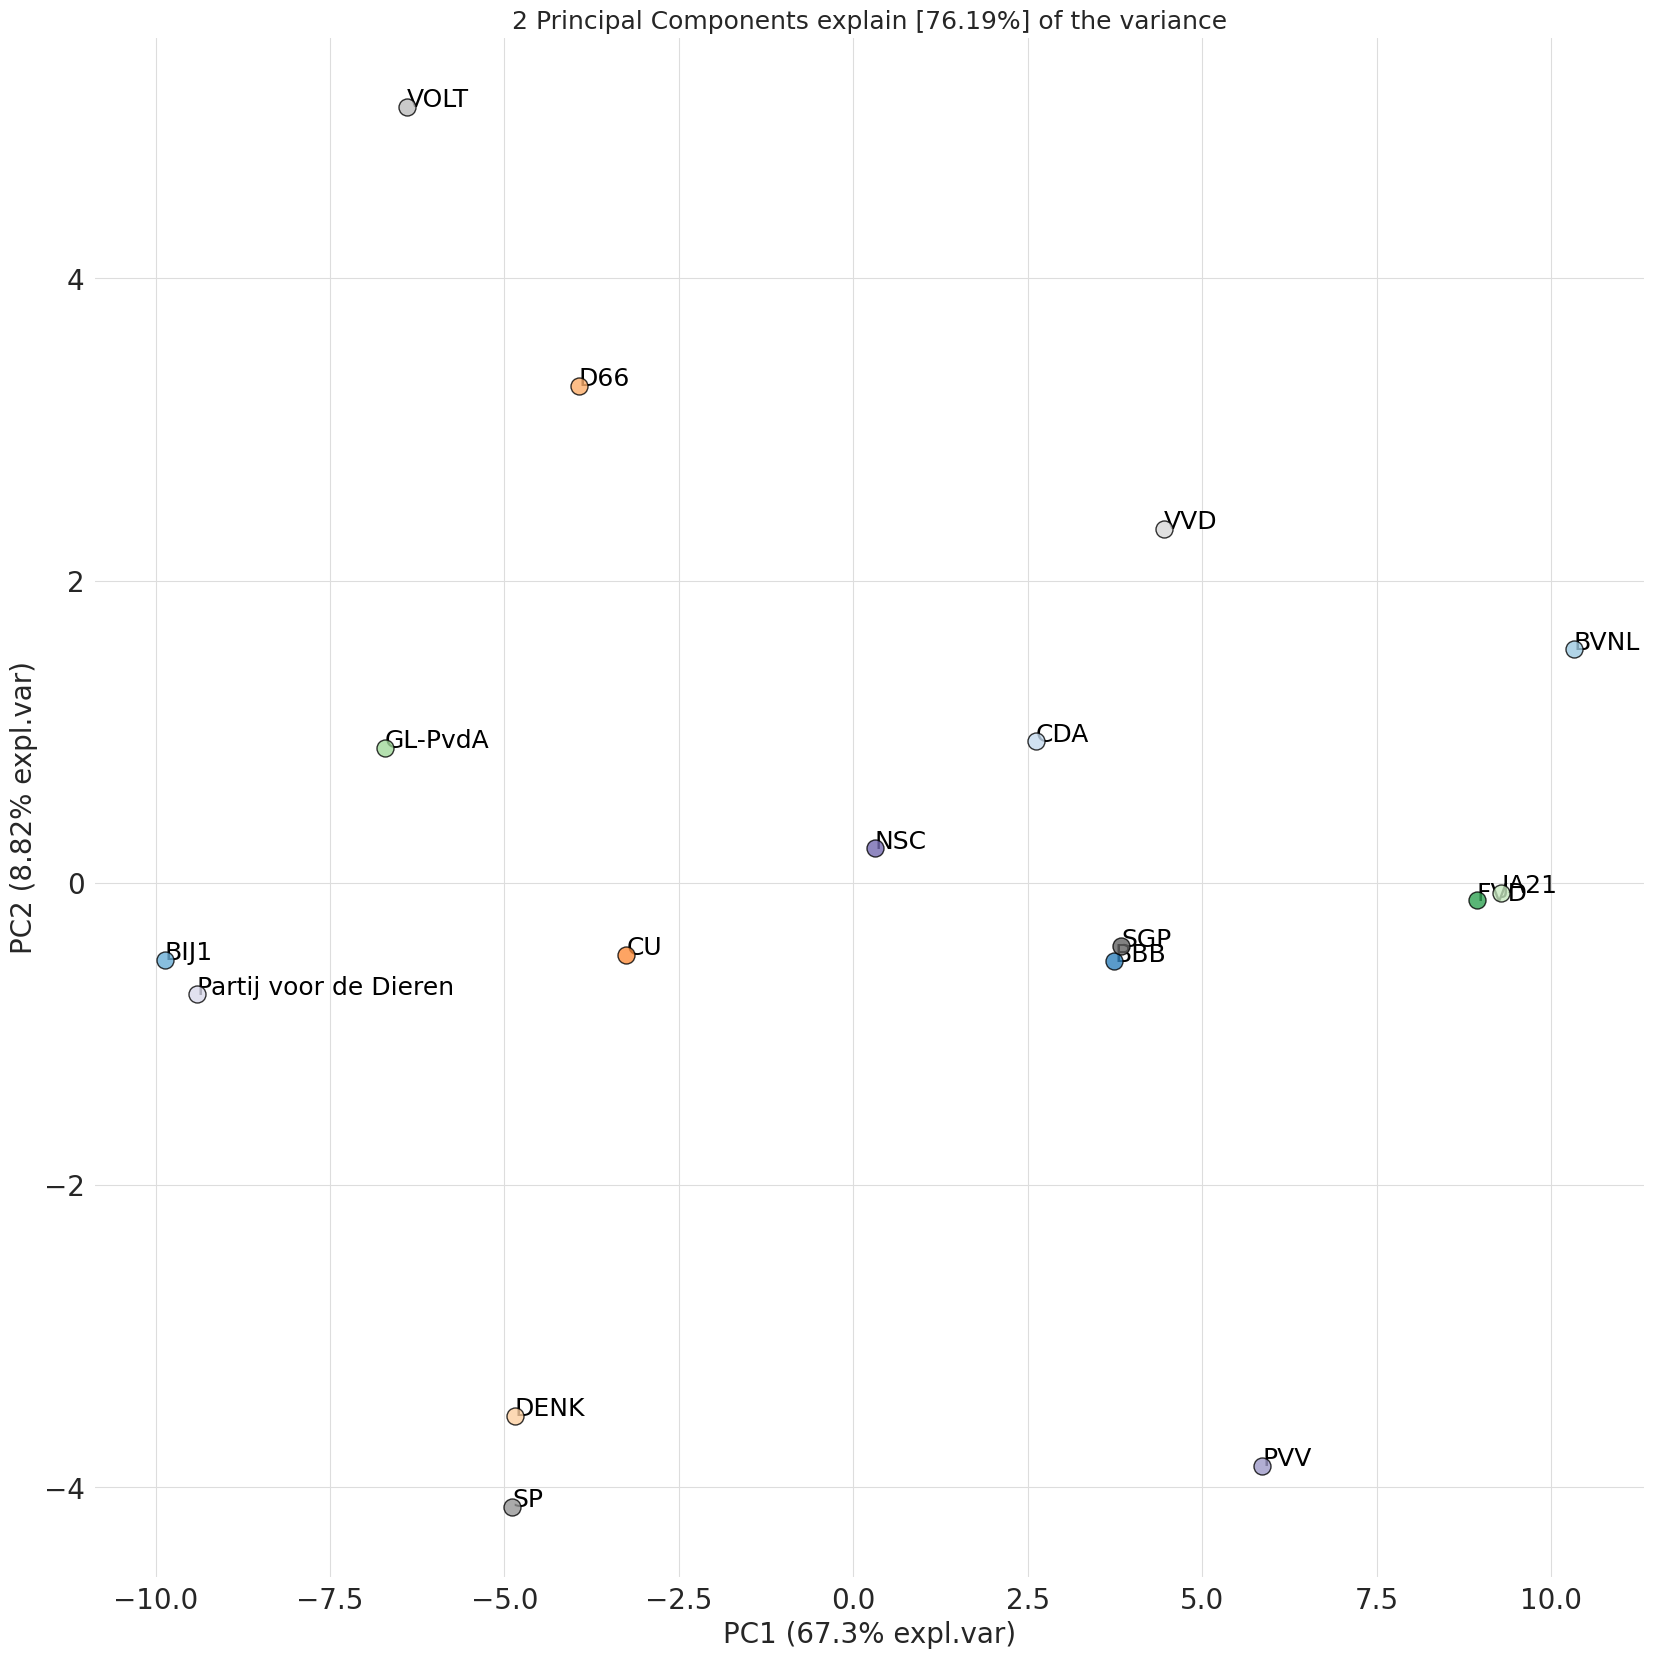

In [32]:
model = pca(n_components=2)
results = model.fit_transform(kieskompas_df_prepared, row_labels=kieskompas_df_labels)
model.scatter(legend=False, figsize=(20,20), labels=kieskompas_df_labels)

#### 3d

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2000x2000 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [84.26%] of the variance'}, xlabel='PC1 (67.3% expl.var)', ylabel='PC2 (8.82% expl.var)', zlabel='PC3 (8.07% expl.var)'>)

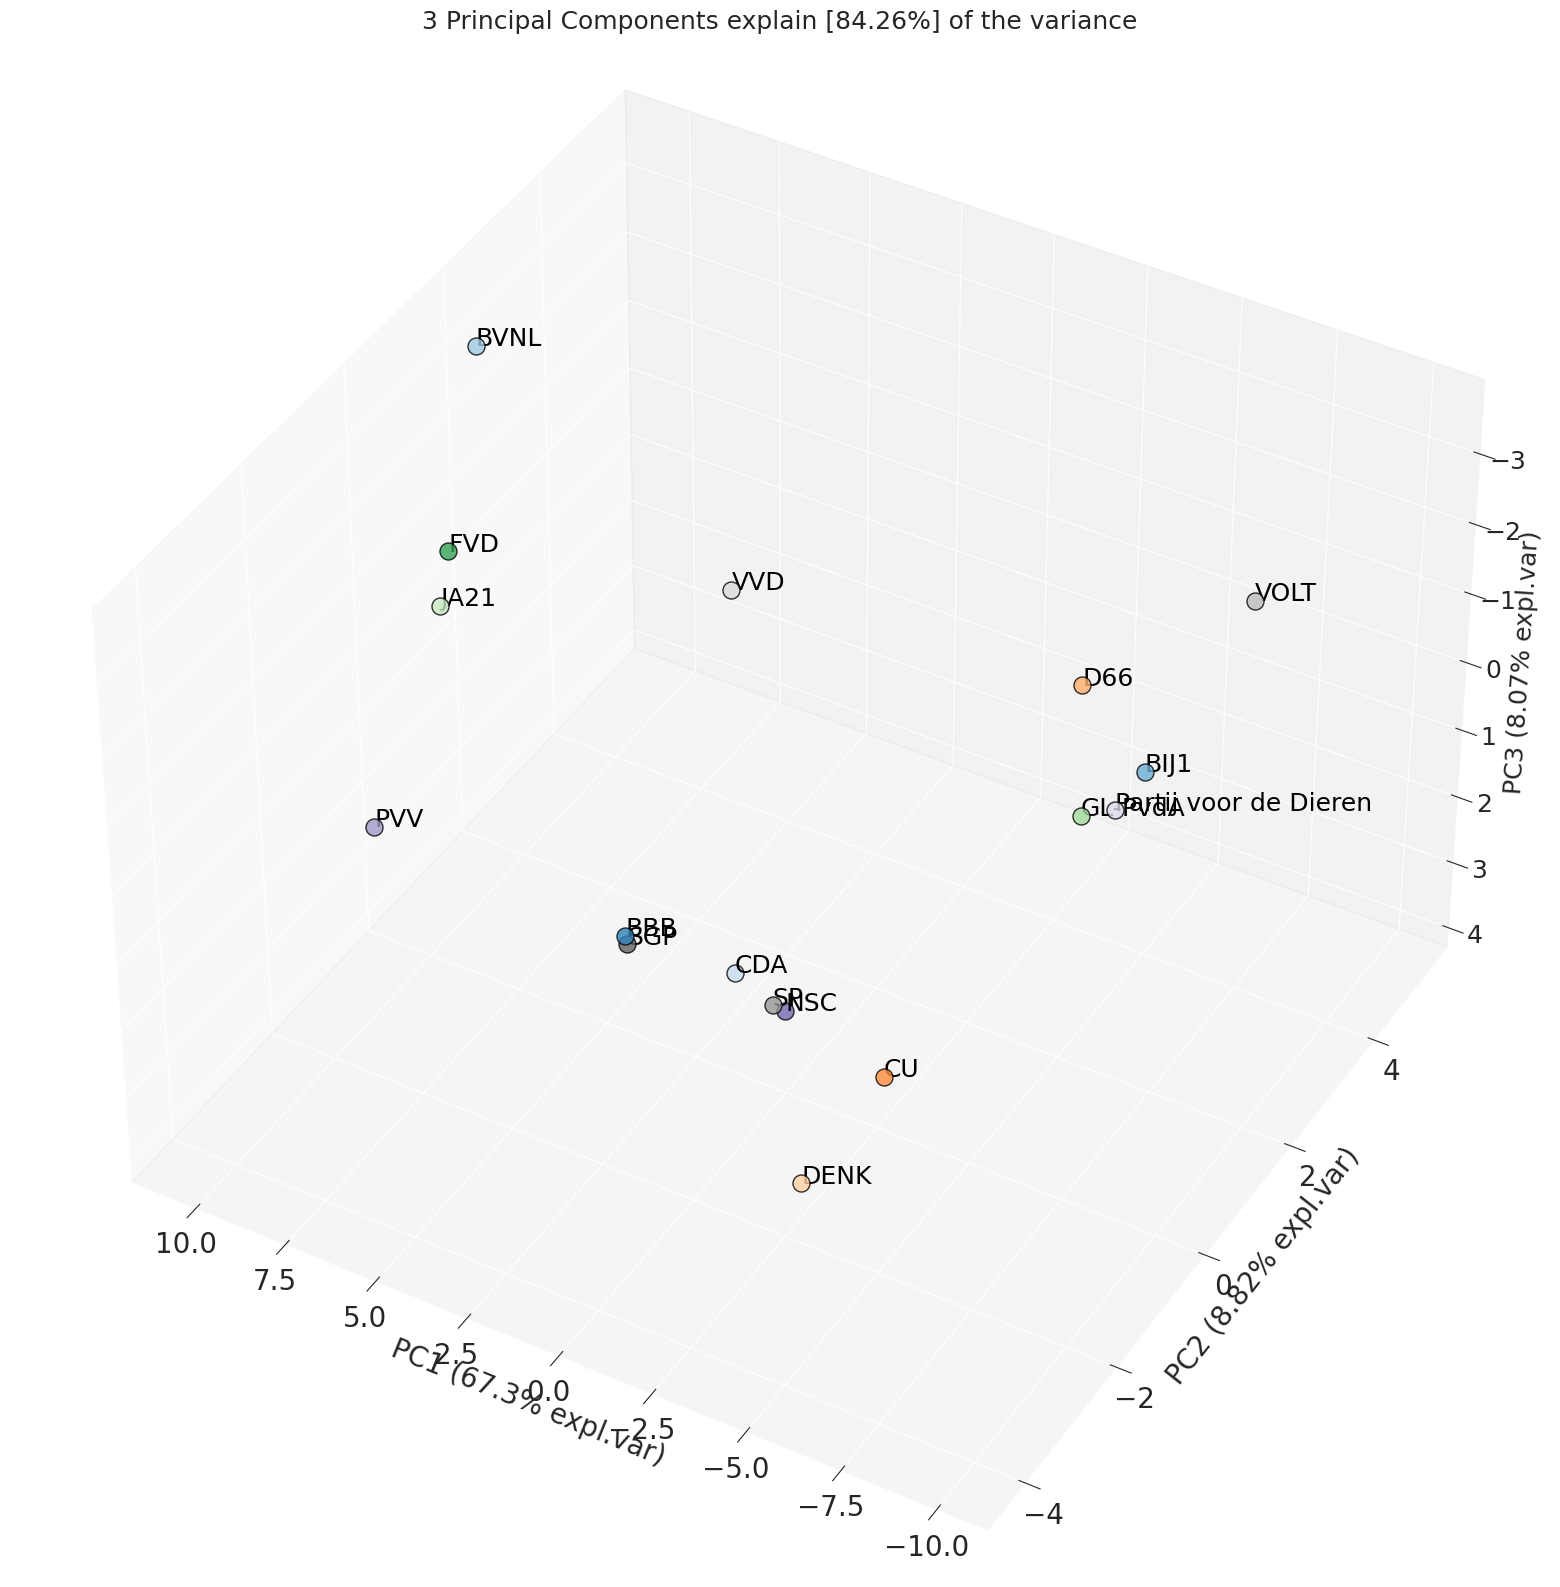

In [33]:
model = pca(n_components=3)
results = model.fit_transform(kieskompas_df_prepared, row_labels=kieskompas_df_labels)
model.scatter3d(legend=False, figsize=(20,20), labels=kieskompas_df_labels)

### Analyse componenten

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


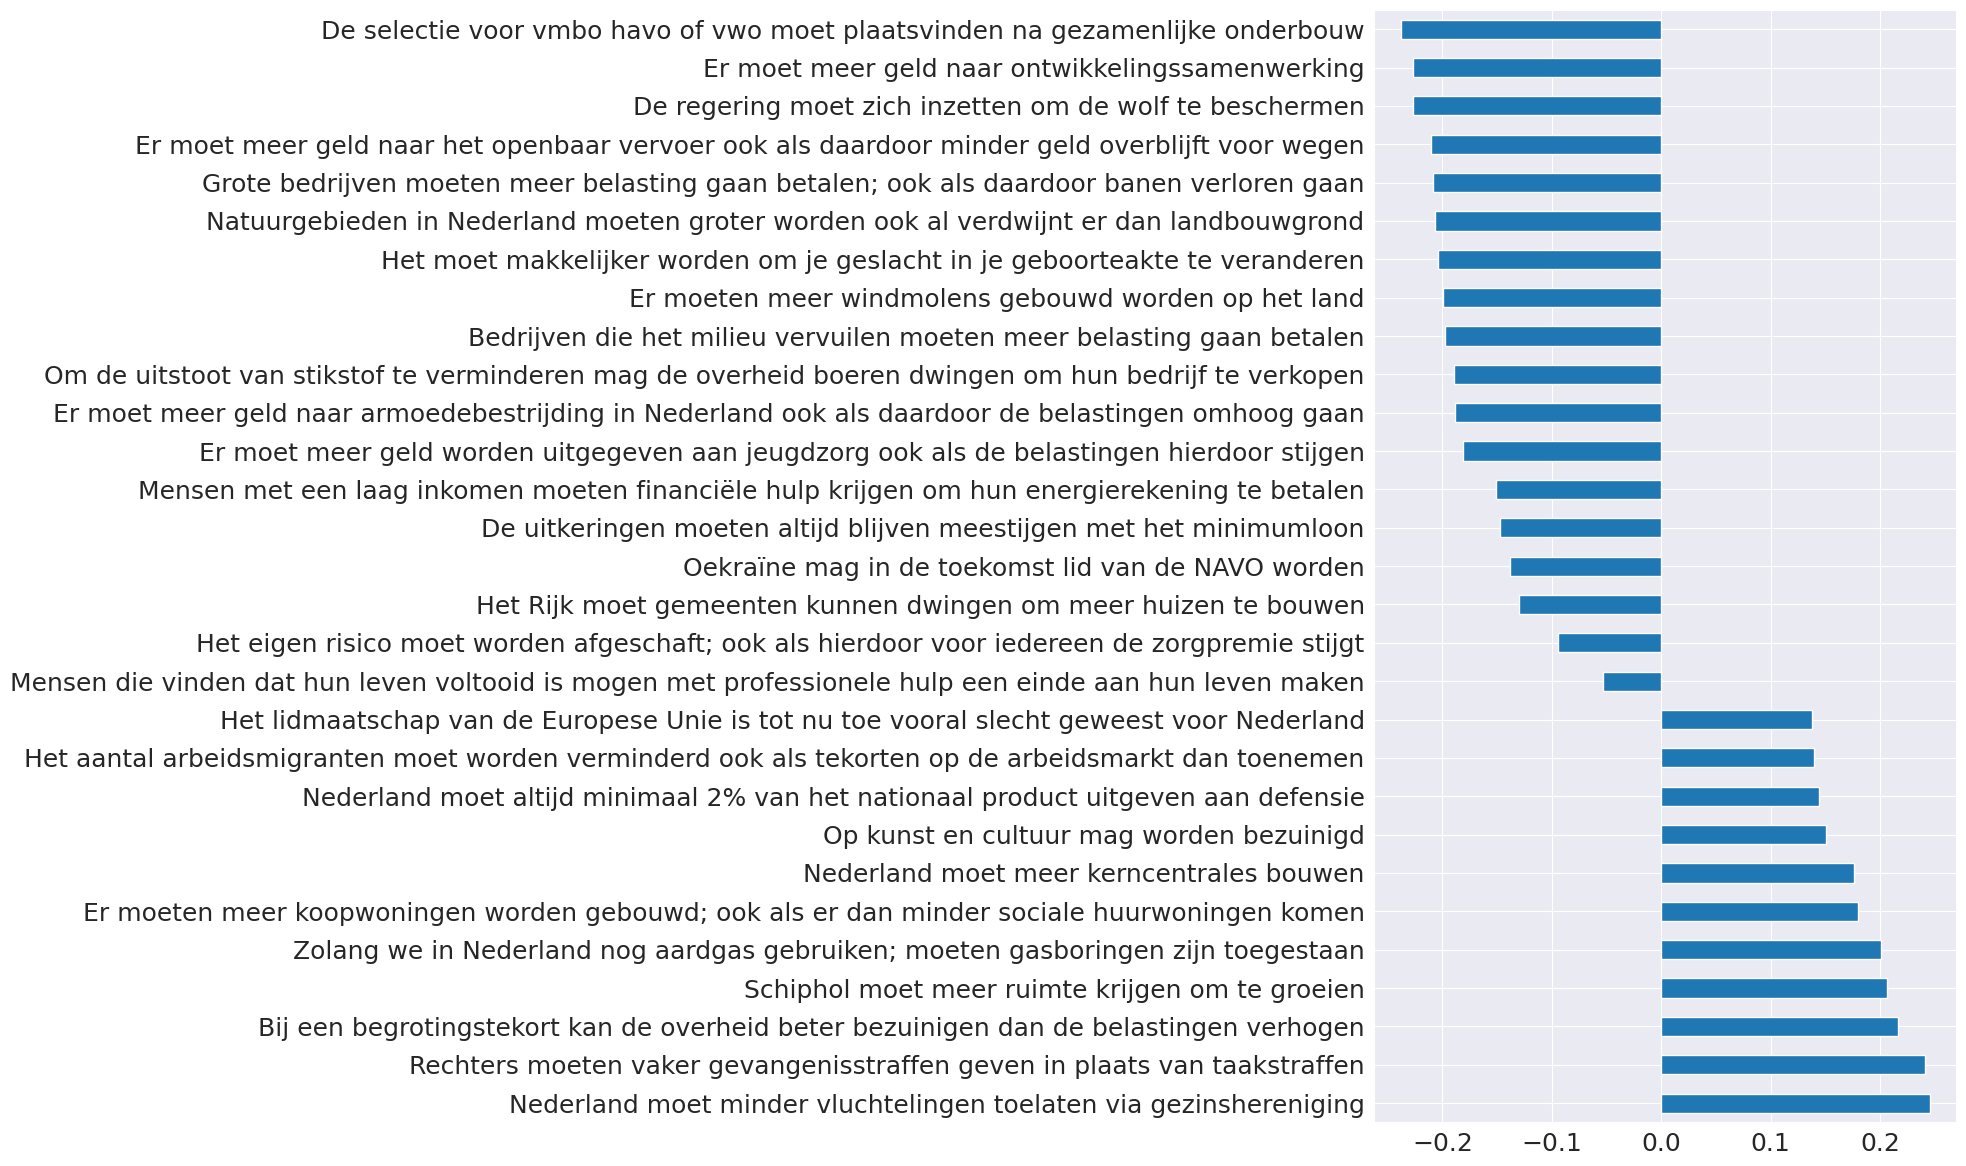

In [34]:
model = pca(n_components=2)
results = model.fit_transform(kieskompas_df_prepared, row_labels=kieskompas_df_labels)
component_df = model.results["loadings"].iloc[0].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20,12))
component_df.plot.barh(ax=ax)
fig.tight_layout()

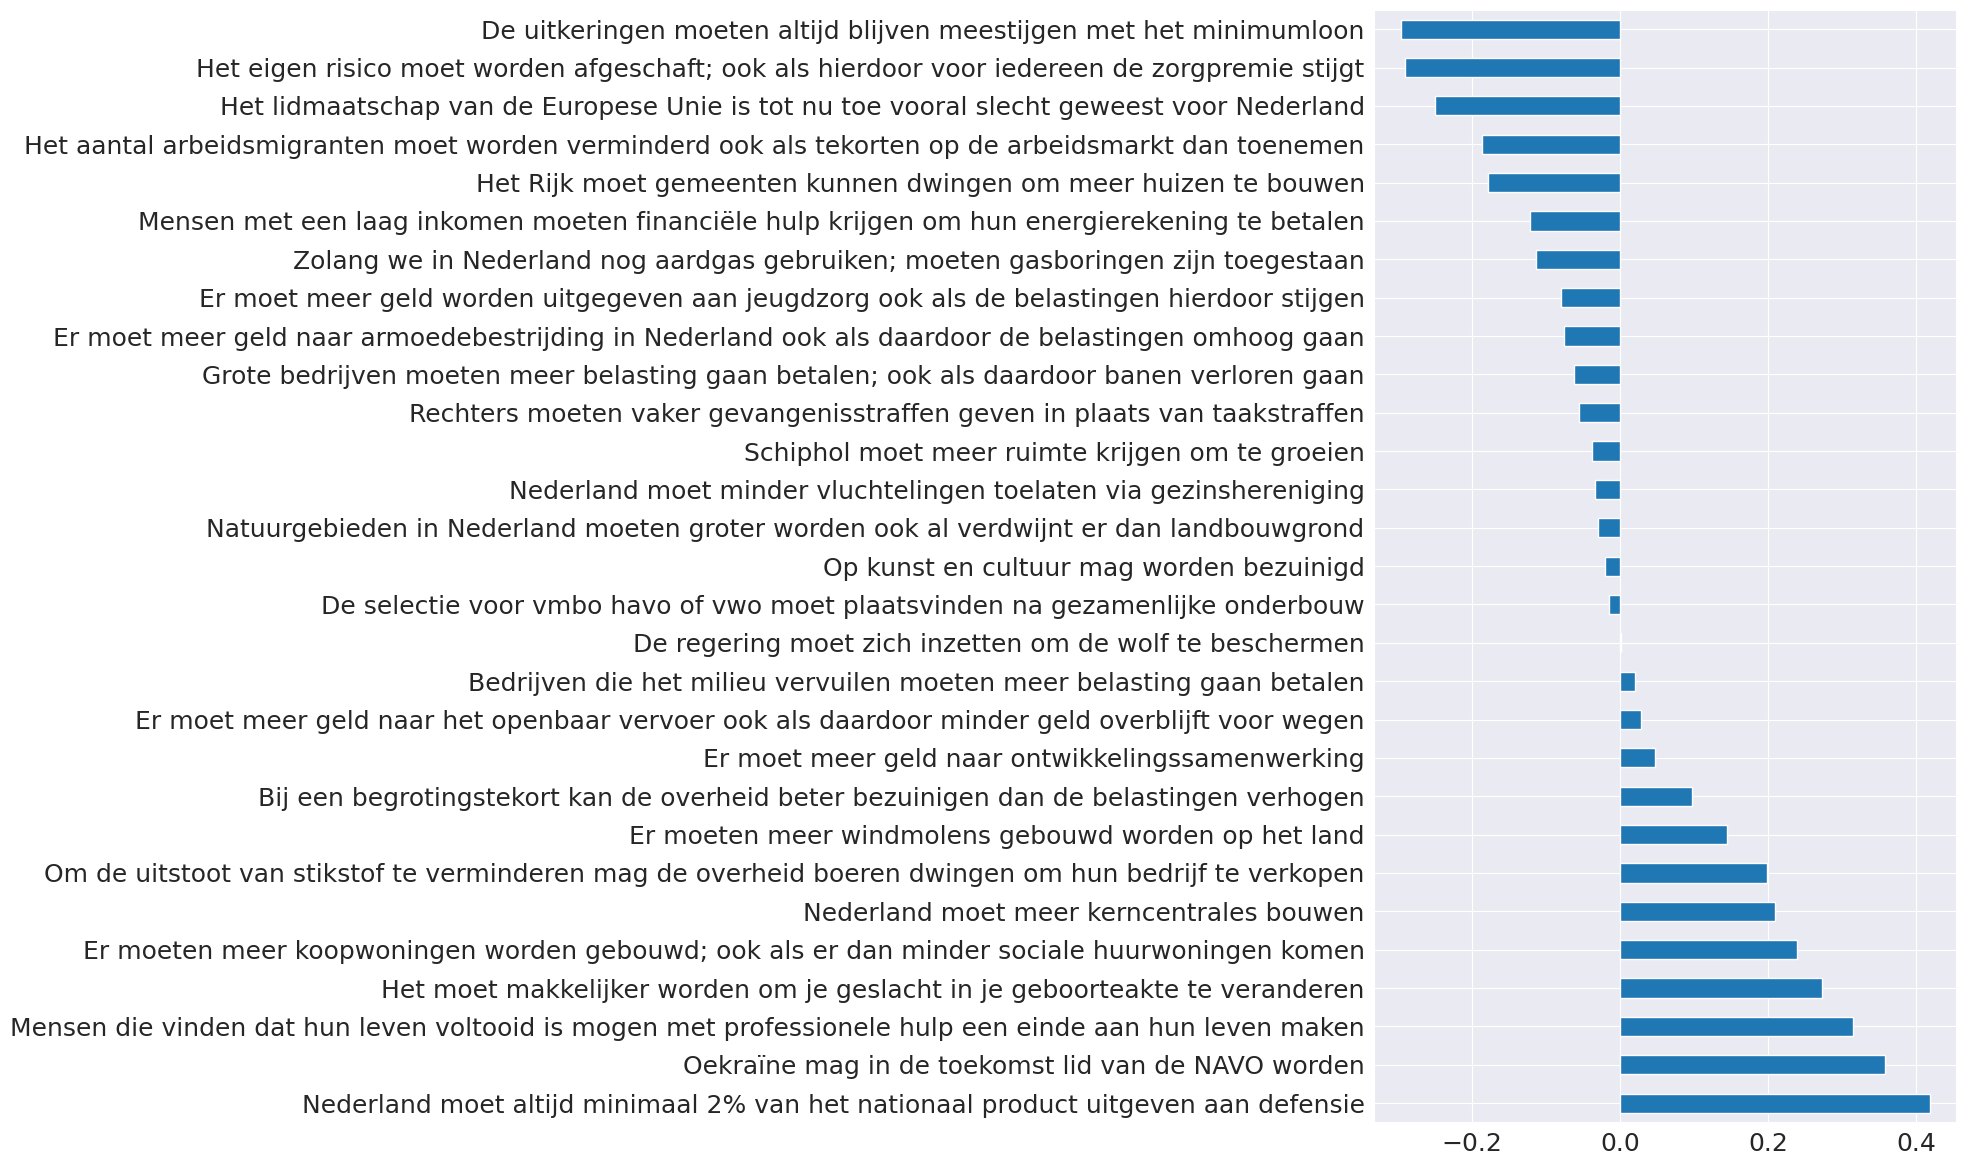

In [35]:
component_df = model.results["loadings"].iloc[1].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20,12))
component_df.plot.barh(ax=ax)
fig.tight_layout()

### Correlatie standpunten van de partijen

<Axes: >

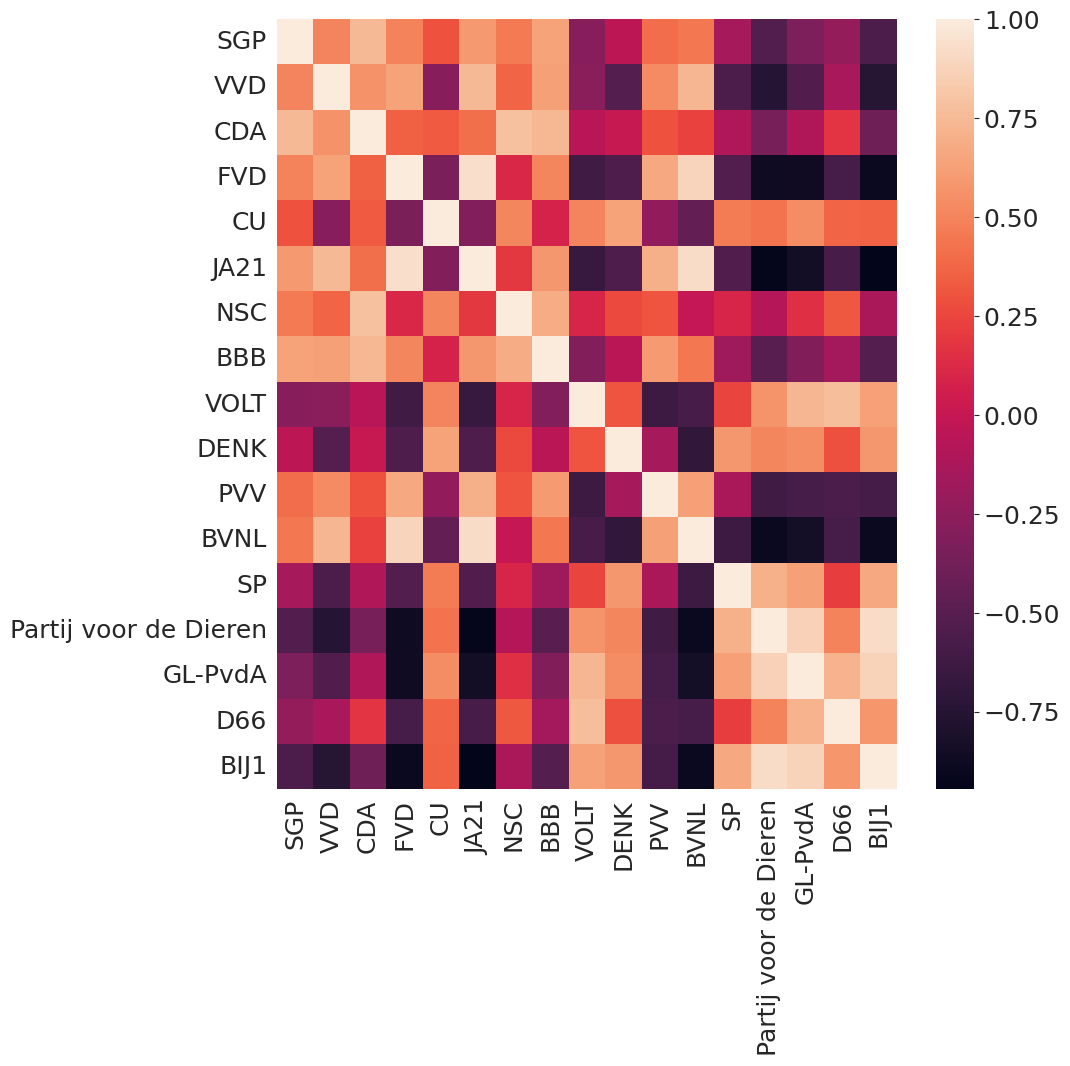

In [36]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(kieskompas_df.corr())

In [37]:
kieskompas_df.corr()

SGP       VVD       CDA       FVD        CU  \
SGP                    1.000000  0.498676  0.742955  0.496533  0.295812   
VVD                    0.498676  1.000000  0.563205  0.639830 -0.280328   
CDA                    0.742955  0.563205  1.000000  0.347505  0.328573   
FVD                    0.496533  0.639830  0.347505  1.000000 -0.333067   
CU                     0.295812 -0.280328  0.328573 -0.333067  1.000000   
JA21                   0.593788  0.745577  0.410906  0.932560 -0.305816   
NSC                    0.455999  0.362060  0.782175  0.111626  0.507366   
BBB                    0.642521  0.624179  0.737032  0.511349  0.086527   
VOLT                  -0.280852 -0.269583 -0.060893 -0.613763  0.501477   
DENK                  -0.036527 -0.513088  0.011466 -0.544102  0.641826   
PVV                    0.403871  0.534769  0.294340  0.659435 -0.231494   
BVNL                   0.447891  0.731928  0.234035  0.883869 -0.446368   
SP                    -0.141408 -0.557567 -0.106885 -0.530002  0.466801   
Partij voor de Dieren -0.527947 -0.754800 -0.357807 -0.870775  0.426793   
GL-PvdA               -0.328309 -0.537104 -0.097485 -0.869068  0.542719   
D66                   -0.217313 -0.137651  0.174447 -0.585792  0.362416   
BIJ1                  -0.555560 -0.743069 -0.404159 -0.890381  0.358504   

                           JA21       NSC       BBB      VOLT      DENK  \
SGP                    0.593788  0.455999  0.642521 -0.280852 -0.036527   
VVD                    0.745577  0.362060  0.624179 -0.269583 -0.513088   
CDA                    0.410906  0.782175  0.737032 -0.060893  0.011466   
FVD                    0.932560  0.111626  0.511349 -0.613763 -0.544102   
CU                    -0.305816  0.507366  0.086527  0.501477  0.641826   
JA21                   1.000000  0.187794  0.585716 -0.661629 -0.545692   
NSC                    0.187794  1.000000  0.683809  0.098625  0.256326   
BBB                    0.585716  0.683809  1.000000 -0.304223 -0.050758   
VOLT                  -0.661629  0.098625 -0.304223  1.000000  0.306212   
DENK                  -0.545692  0.256326 -0.050758  0.306212  1.000000   
PVV                    0.699018  0.303470  0.603367 -0.632619 -0.147556   
BVNL                   0.922785 -0.008167  0.447431 -0.574231 -0.689285   
SP                    -0.540137  0.100093 -0.171843  0.243366  0.589468   
Partij voor de Dieren -0.925324 -0.074291 -0.494562  0.570185  0.511477   
GL-PvdA               -0.848436  0.150841 -0.311638  0.726941  0.539233   
D66                   -0.579381  0.322966 -0.158093  0.771245  0.286898   
BIJ1                  -0.945880 -0.127138 -0.518591  0.629898  0.584174   

                            PVV      BVNL        SP  Partij voor de Dieren  \
SGP                    0.403871  0.447891 -0.141408              -0.527947   
VVD                    0.534769  0.731928 -0.557567              -0.754800   
CDA                    0.294340  0.234035 -0.106885              -0.357807   
FVD                    0.659435  0.883869 -0.530002              -0.870775   
CU                    -0.231494 -0.446368  0.466801               0.426793   
JA21                   0.699018  0.922785 -0.540137              -0.925324   
NSC                    0.303470 -0.008167  0.100093              -0.074291   
BBB                    0.603367  0.447431 -0.171843              -0.494562   
VOLT                  -0.632619 -0.574231  0.243366               0.570185   
DENK                  -0.147556 -0.689285  0.589468               0.511477   
PVV                    1.000000  0.624747 -0.126305              -0.613352   
BVNL                   0.624747  1.000000 -0.640855              -0.893219   
SP                    -0.126305 -0.640855  1.000000               0.703695   
Partij voor de Dieren -0.613352 -0.893219  0.703695               1.000000   
GL-PvdA               -0.582898 -0.842626  0.624559               0.870506   
D66                   -0.558314 -0.582158  0.214847               0.490938   
